# Final Project Data Science Track

# **Business Understanding**

## **Background**

Pertanian merupakan sektor yang memiliki dampak signifikan terhadap perekonomian global, khususnya dalam konteks negara-negara berkembang dan maju. Negara-negara G20, yang terdiri dari negara-negara dengan ekonomi terbesar di dunia, memiliki peran penting dalam produksi dan perdagangan pertanian. Pengaruh sektor pertanian terhadap perekonomian, keberlanjutan lingkungan, dan efisiensi energi menjadi isu yang semakin penting dalam mencapai tujuan pembangunan berkelanjutan. Oleh karena itu, penting untuk memahami bagaimana berbagai faktor pertanian seperti lahan pertanian, ekspor bahan baku pertanian, emisi karbon, dan energi berhubungan dengan aspek ekonomi, sosial, dan lingkungan di negara-negara G20.

Studi ini bertujuan untuk mengidentifikasi pola dan kluster negara-negara G20 berdasarkan karakteristik sektor pertanian dan efisiensi energi untuk memberikan gambaran yang lebih jelas mengenai hubungan antar sektor tersebut dan bagaimana masing-masing negara mengelola sektor pertanian serta dampaknya terhadap keberlanjutan ekonomi dan lingkungan.

## **Business Problem**

Bisnis dan pemerintah perlu mengetahui bagaimana kebijakan dan praktik pertanian di negara-negara G20 memengaruhi keberlanjutan ekonomi, sosial, dan lingkungan mereka. Sebagai contoh, beberapa negara mengandalkan sektor pertanian sebagai bagian besar dari ekonomi mereka, sementara yang lain mungkin lebih fokus pada teknologi atau energi terbarukan. Business problem yang coba ditangani dalam analisis ini adalah:
- Bagaimana mengelompokkan negara-negara G20 berdasarkan karakteristik sektor pertanian dan efisiensi energi mereka?
- Bagaimana negara-negara tersebut dapat memperbaiki kebijakan mereka berdasarkan hasil klustering tersebut?

Tujuan utama dari analisis ini adalah:
- Mengidentifikasi pola kluster negara-negara G20 berdasarkan faktor-faktor terkait sektor pertanian dan energi.
- Menilai hubungan antara sektor pertanian dan dampaknya terhadap ekonomi dan keberlanjutan energi.
- Memberikan rekomendasi bagi negara-negara G20 untuk perbaikan kebijakan sektor pertanian dan energi mereka berdasarkan hasil clustering.

Beberapa keterbatasan dalam analisis ini adalah:
- **Keterbatasan Data**: Data yang digunakan dalam analisis ini terbatas pada indikator-indikator tertentu yang mungkin tidak sepenuhnya mewakili kompleksitas sektor pertanian dan energi di negara-negara G20.
- **Model Dimensionality Reduction**: Proses pengurangan dimensi menggunakan metode seperti PCA dan t-SNE mungkin kehilangan beberapa informasi penting yang dapat mempengaruhi interpretasi hasil.
- **Pendekatan Clustering**: Clustering menggunakan teknik seperti KMeans atau Agglomerative Clustering hanya memberikan pola yang dapat dikenali tetapi tidak memberikan informasi tentang sebab-akibat antara faktor-faktor yang dianalisis.
- **Variabilitas Data**: Variabilitas antar negara yang sangat besar (misalnya, antara negara maju dan berkembang) bisa menyebabkan kesulitan dalam generalisasi hasil clustering.

# **Data Understanding**

In [1]:
# data understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# data preparation
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import pearsonr

# modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

> **Insight**:
> 1. Data Understanding:
- `pandas`: Digunakan untuk manipulasi dan analisis data, seperti memuat data ke dalam DataFrame, melakukan agregasi, dan pengolahan data secara umum.
- `numpy`: Digunakan untuk operasi matematika pada array dan matriks, serta menyediakan fungsi untuk operasi numerik yang lebih efisien.
- `matplotlib.pyplot`: Untuk visualisasi data, memungkinkan pembuatan grafik dasar seperti scatter plot, line plot, histogram, dll.
- `seaborn`: Dibangun di atas matplotlib, digunakan untuk visualisasi data statistik yang lebih kaya dan menarik, seperti heatmaps, pair plots, dll.
- `requests`: Digunakan untuk mengambil data dari API atau sumber data web lainnya, memungkinkan pengguna untuk mengakses data secara langsung dari internet.
- `StringIO`: Digunakan untuk memanipulasi data dalam format string yang menyerupai file (misalnya membaca file CSV dari string).

> 2. Data Preparation:
- `plotly.graph_objects` dan `plotly.express`: Keduanya adalah pustaka visualisasi interaktif yang digunakan untuk membuat grafik yang lebih dinamis dan interaktif, misalnya scatter plot, bar chart, line chart, dan lainnya dengan kemampuan zoom, hover, dan lainnya.
- `scipy.stats.pearsonr`: Digunakan untuk menghitung koefisien korelasi Pearson antara dua variabel numerik, yang memberikan informasi tentang seberapa kuat hubungan linier antara dua variabel.

> 3. Data Modeling:
- `MinMaxScaler`: Digunakan untuk penskalaan fitur agar berada dalam rentang tertentu, umumnya antara 0 dan 1, yang penting dalam beberapa algoritma machine learning, terutama yang berbasis jarak.
- `KMeans` dan `AgglomerativeClustering`: Kedua algoritma ini digunakan untuk **clustering**, yaitu pengelompokan data berdasarkan kesamaan fitur. KMeans adalah teknik clustering berbasis centroid, sementara AgglomerativeClustering adalah metode berbasis hirarkis.
- `silhouette_score`: Digunakan untuk mengevaluasi kualitas clustering dengan memberikan nilai antara -1 dan 1, yang menunjukkan seberapa baik setiap titik data dikelompokkan dengan titik data lain dalam cluster yang sama.
- `PCA (Principal Component Analysis)`: Teknik reduksi dimensi yang digunakan untuk mereduksi jumlah fitur dalam dataset sambil mempertahankan sebanyak mungkin informasi yang ada dalam data.
- `TSNE (t-Distributed Stochastic Neighbor Embedding)`: Juga merupakan metode reduksi dimensi yang sangat efektif untuk visualisasi data dalam dimensi rendah (biasanya 2D atau 3D) dari data dengan dimensi yang lebih tinggi.

## **OECD Data**

In [2]:
# menentukan URL API
url = "https://sdmx.oecd.org/public/rest/data/OECD.ENV.EPI,DSD_GG@DF_GREEN_GROWTH,/EU27_2020+USA+GBR+TUR+ZAF+SAU+RUS+MEX+KOR+JPN+ITA+IDN+IND+FRA+DEU+CHN+CAN+BRA+AUS+ARG..SOC+POPDEN+POP_NETMIGR+POP_LIFEEXP+POP_FERTILITY+POP_Y_GT65+POP_Y15T64+POP_Y_LT14+POP_F+ECO+DEF+PPP+XR+GDP_RCAP+LTAX+GDP_PC+GDP_R+MAT+PBAL_HA+NBAL_HA+MWAS_LANDF+MWAS_RECO+MWAS_INC+MWAS_INT+DMC_MET+DMC_MIN+DMC_BIO+DMC_PROD+NRG+RE_TPES_EBIOM+NRGC+RE_NRG+RE_TPES+NRGS+NRG_INT+NRG_PROD..?startPeriod=2001&endPeriod=2023&dimensionAtObservation=AllDimensions&format=csvfilewithlabels"

# menentukan header untuk meminta data sebagai CSV
headers = {
    "Accept": "text/csv"
}

# mengirim permintaan GET
response = requests.get(url, headers=headers)

# memeriksa apakah permintaan berhasil
if response.status_code == 200:
    # mengubah konten CSV menjadi pandas DataFrame
    data_oecd = StringIO(response.text)
    data_oecd = pd.read_csv(data_oecd)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

# menampilkan beberapa feature pertama dari DataFrame
data_oecd.head()

STRUCTURE                              STRUCTURE_ID STRUCTURE_NAME ACTION  \
0  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
1  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
2  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
3  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   
4  DATAFLOW  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)   Green Growth      I   

  REF_AREA Reference area FREQ Frequency of observation MEASURE  \
0      AUS      Australia    A                   Annual     ECO   
1      CAN         Canada    A                   Annual     ECO   
2      FRA         France    A                   Annual     ECO   
3      DEU        Germany    A                   Annual     ECO   
4      ITA          Italy    A                   Annual     ECO   

            Measure  ... UNIT_MULT Unit multiplier PRICE_BASE      Price base  \
0  Economic context  ...         0           Units         _Z  Not applicable   
1  Economic context  ...         0           Units         _Z  Not applicable   
2  Economic context  ...         0           Units         _Z  Not applicable   
3  Economic context  ...         0           Units         _Z  Not applicable   
4  Economic context  ...         0           Units         _Z  Not applicable   

   BASE_PER  Base period  TIMELINESS          Timeliness DECIMALS Decimals  
0       NaN          NaN           1  1 year lag, timely        2      Two  
1       NaN          NaN           1  1 year lag, timely        2      Two  
2       NaN          NaN           1  1 year lag, timely        2      Two  
3       NaN          NaN           1  1 year lag, timely        2      Two  
4       NaN          NaN           1  1 year lag, timely        2      Two  

[5 rows x 32 columns]

> **Insight**:
- Kode ini mengakses data dari API SDMX milik OECD dan mengunduh data dalam format CSV berdasarkan parameter yang ditentukan dalam URL.
- Setelah berhasil mendapatkan data, kode ini memuat data CSV tersebut ke dalam `pandas DataFrame` yang memudahkan analisis dan manipulasi lebih lanjut.
- Secara keseluruhan, ini adalah contoh alur kerja yang umum digunakan untuk mengakses, memuat, dan memproses data statistik dari API eksternal untuk analisis lebih lanjut dalam Python.
- Fungsi `head()` adalah alat yang sangat berguna untuk mengeksplorasi dan memverifikasi data secara cepat. Ini memberikan gambaran sekilas tentang data, memungkinkan Anda untuk memeriksa apakah data telah dimuat dengan benar dan untuk mempersiapkan analisis lebih lanjut.

In [3]:
# menampilkan informasi ringkas tentang DataFrame
data_oecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23252 entries, 0 to 23251
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 23252 non-null  object 
 1   STRUCTURE_ID              23252 non-null  object 
 2   STRUCTURE_NAME            23252 non-null  object 
 3   ACTION                    23252 non-null  object 
 4   REF_AREA                  23252 non-null  object 
 5   Reference area            23252 non-null  object 
 6   FREQ                      23252 non-null  object 
 7   Frequency of observation  23252 non-null  object 
 8   MEASURE                   23252 non-null  object 
 9   Measure                   23252 non-null  object 
 10  UNIT_MEASURE              23252 non-null  object 
 11  Unit of measure           23252 non-null  object 
 12  ACTIVITY                  23252 non-null  object 
 13  Economic activity         23252 non-null  object 
 14  TIME_P

> **Insight**:
- Fungsi `info()` adalah alat yang sangat berguna untuk mendapatkan gambaran umum dan ringkas tentang dataset Anda, khususnya terkait jumlah data, tipe data kolom, serta masalah nilai null.
- Informasi yang diberikan oleh `info()` dapat membantu Anda dalam melakukan pembersihan data (misalnya, menangani nilai yang hilang atau kolom dengan tipe data yang salah) dan merencanakan langkah-langkah analisis berikutnya.

## **World Bank Data**

In [4]:
# membaca file excel yang berisi data World Bank dan menyimpannya dalam DataFrame df_world_bank
# data_world_bank = pd.read_excel('data_world_bank.xlsx')
data_world_bank = pd.read_excel('https://raw.githubusercontent.com/kristian-susanto/Clustering-of-Agricultural-Workforce-in-G20-Member-Countries-from-2001-2023/main/data_world_bank.xlsx')

# menampilkan beberapa feature pertama dari DataFrame
data_world_bank.head()

Series Name     Series Code  \
0  Employment in agriculture (% of total employme...  SL.AGR.EMPL.ZS   
1  Employment in agriculture (% of total employme...  SL.AGR.EMPL.ZS   
2  Employment in agriculture (% of total employme...  SL.AGR.EMPL.ZS   
3  Employment in agriculture (% of total employme...  SL.AGR.EMPL.ZS   
4  Employment in agriculture (% of total employme...  SL.AGR.EMPL.ZS   

     Country Name Country Code  2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  \
0       Argentina          ARG       1.065900       1.061939       1.021523   
1       Australia          AUS       4.754306       4.382115       3.913121   
2          Brazil          BRA      15.324849      15.407717      15.566475   
3           China          CHN      50.000000      50.000000      49.099490   
4  European Union          EUU       8.221431       7.718280       7.537811   

   2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  ...  2014 [YR2014]  \
0       0.969933       0.919946       0.873533  ...       0.677366   
1       3.737893       3.579841       3.411950  ...       2.798319   
2      16.043453      15.516146      14.495949  ...       9.306502   
3      46.900248      44.800193      42.600496  ...      29.500472   
4       6.968224       6.821337       6.469581  ...       5.180080   

   2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  2019 [YR2019]  \
0       0.625514       0.608956       0.631426       0.624305       0.609655   
1       2.636508       2.621225       2.596054       2.616852       2.558293   
2       9.332391       9.797930       9.191428       9.056942       8.877276   
3      28.300473      27.422126      26.683582      25.751497      24.721990   
4       5.001719       4.751347       4.625900       4.449460       4.306253   

   2020 [YR2020]  2021 [YR2021]  2022 [YR2022]  2023 [YR2023]  
0       0.605510       0.570907       0.646133       0.612884  
1       2.765998       2.491567       2.177414       2.147565  
2       9.314073       9.495609       8.731441       8.202819  
3      23.599862      23.389544      22.757692       22.33371  
4       4.279546       4.103158       3.956485       3.793414  

[5 rows x 27 columns]

> **Insight**:
- Fungsi `pd.read_excel()` memungkinkan Anda untuk langsung mengakses dan memuat data dari file Excel yang tersedia secara online pada [dataset World Bank](https://databank.worldbank.org/reports.aspx?source=2&Topic=19#).
- Setelah file dibaca ke dalam DataFrame, Anda bisa melanjutkan dengan eksplorasi, pembersihan, analisis, atau visualisasi data lebih lanjut.
- Fungsi `head()` adalah alat yang sangat berguna untuk mengeksplorasi dan memverifikasi data secara cepat. Ini memberikan gambaran sekilas tentang data, memungkinkan Anda untuk memeriksa apakah data telah dimuat dengan benar dan untuk mempersiapkan analisis lebih lanjut.

In [5]:
# menampilkan informasi ringkas tentang DataFrame
data_world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    100 non-null    object 
 1   Series Code    100 non-null    object 
 2   Country Name   100 non-null    object 
 3   Country Code   100 non-null    object 
 4   2001 [YR2001]  100 non-null    float64
 5   2002 [YR2002]  100 non-null    float64
 6   2003 [YR2003]  100 non-null    float64
 7   2004 [YR2004]  100 non-null    float64
 8   2005 [YR2005]  100 non-null    float64
 9   2006 [YR2006]  100 non-null    float64
 10  2007 [YR2007]  100 non-null    float64
 11  2008 [YR2008]  100 non-null    float64
 12  2009 [YR2009]  100 non-null    float64
 13  2010 [YR2010]  100 non-null    float64
 14  2011 [YR2011]  100 non-null    float64
 15  2012 [YR2012]  100 non-null    float64
 16  2013 [YR2013]  100 non-null    float64
 17  2014 [YR2014]  100 non-null    float64
 18  2015 [YR201

> **Insight**:
- Fungsi `info()` adalah alat yang sangat berguna untuk mendapatkan gambaran umum dan ringkas tentang dataset Anda, khususnya terkait jumlah data, tipe data kolom, serta masalah nilai null.
- Informasi yang diberikan oleh `info()` dapat membantu Anda dalam melakukan pembersihan data (misalnya, menangani nilai yang hilang atau kolom dengan tipe data yang salah) dan merencanakan langkah-langkah analisis berikutnya.

# **Data Preparation**

## **Data Transformation**

### **OECD Data**

In [6]:
# memilih beberapa feature dan disimpan dalam variabel baru yang bernama data_temp_oecd
data_temp_oecd = data_oecd[['Reference area','Measure','Unit of measure','TIME_PERIOD','OBS_VALUE']]

# menampilkan beberapa feature pertama dari DataFrame
data_temp_oecd.head()

Reference area           Measure Unit of measure  TIME_PERIOD  OBS_VALUE
0      Australia  Economic context     Unspecified         2023        NaN
1         Canada  Economic context     Unspecified         2023        NaN
2         France  Economic context     Unspecified         2023        NaN
3        Germany  Economic context     Unspecified         2023        NaN
4          Italy  Economic context     Unspecified         2023        NaN

> **Insight**:
- Seleksi Kolom dan Pemeriksaan Awal adalah langkah penting dalam pembersihan dan persiapan data. Langkah ini membantu untuk memilih hanya data yang diperlukan, menyederhanakan dataset, dan menghindari penggunaan kolom yang tidak relevan.
- Fungsi `head()` memungkinkan Anda untuk dengan cepat memeriksa hasil dari seleksi kolom dan memastikan bahwa data yang dipilih sesuai dengan yang diinginkan sebelum melanjutkan ke tahap analisis atau visualisasi lebih lanjut.

In [7]:
# menggabungkan beberapa feature
data_temp_oecd['Measure'] = data_temp_oecd['Measure'] + ' (' + data_temp_oecd['Unit of measure'] + ')'

# menghapus feature Unit of measure
data_temp_oecd = data_temp_oecd.drop(columns = 'Unit of measure')

# menampilkan beberapa feature pertama dari DataFrame
data_temp_oecd.head()

/tmp/ipython-input-1559188420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp_oecd['Measure'] = data_temp_oecd['Measure'] + ' (' + data_temp_oecd['Unit of measure'] + ')'


Reference area                         Measure  TIME_PERIOD  OBS_VALUE
0      Australia  Economic context (Unspecified)         2023        NaN
1         Canada  Economic context (Unspecified)         2023        NaN
2         France  Economic context (Unspecified)         2023        NaN
3        Germany  Economic context (Unspecified)         2023        NaN
4          Italy  Economic context (Unspecified)         2023        NaN

> **Insight**:
- Kode ini adalah serangkaian langkah yang efektif untuk memanipulasi dan membersihkan data. Penggabungan kolom, penghapusan kolom yang tidak diperlukan, dan pengecekan hasil dengan `head()` adalah praktik umum dalam pembersihan data dan persiapan data untuk analisis lebih lanjut.
- Langkah-langkah ini membantu menyederhanakan struktur DataFrame, meningkatkan keterbacaan dan efisiensi data yang diproses, yang pada gilirannya mempermudah analisis dan visualisasi.

In [8]:
# melakukan pivot table
df_pivot_oecd = data_temp_oecd.pivot_table(index=['TIME_PERIOD','Reference area'],columns='Measure',values='OBS_VALUE')

# me-reset (mengatur ulang) index pivot table agar feature-feature index menjadi instance biasa
df_pivot_oecd.reset_index(inplace=True)

# menampilkan beberapa instance pertama dari DataFrame
df_pivot_oecd.head()

Measure  TIME_PERIOD                Reference area  \
0               2001                     Argentina   
1               2001                     Australia   
2               2001                        Brazil   
3               2001                        Canada   
4               2001  China (People’s Republic of)   

Measure  Consumption of biomass (Percentage of domestic material consumption)  \
0                                                    76.94                      
1                                                    43.30                      
2                                                    71.57                      
3                                                    22.89                      
4                                                    26.18                      

Measure  Consumption of metals (Percentage of domestic material consumption)  \
0                                                     9.34                     
1                                                    36.84                     
2                                                     4.89                     
3                                                    23.26                     
4                                                     6.22                     

Measure  Consumption of non-metallic minerals (Percentage of domestic material consumption)  \
0                                                    13.72                                    
1                                                    19.86                                    
2                                                    23.54                                    
3                                                    53.86                                    
4                                                    67.59                                    

Measure  Energy consumption (Percentage of energy consumption)  \
0                                                   19.998       
1                                                   20.000       
2                                                   19.998       
3                                                   20.000       
4                                                   20.000       

Measure  Energy intensity per capita (Tonnes of oil equivalent per person)  \
0                                                     1.54                   
1                                                     5.49                   
2                                                     1.09                   
3                                                     8.01                   
4                                                     0.92                   

Measure  Energy productivity, GDP per unit of TES (US dollars per tonne of oil equivalent)  \
0                                                 21797.65                                   
1                                                  8314.51                                   
2                                                 12020.64                                   
3                                                  5467.63                                   
4                                                  4479.20                                   

Measure  Female population (Percentage of population)  GDP deflator (Index)  \
0                                               50.70                  1.46   
1                                               50.37                 60.11   
2                                               50.34                 25.22   
3                                               50.48                 70.08   
4                                               48.91                 53.27   

Measure  ...  Real GDP (US dollars, PPP converted)  \
0        ...                            1245343.38   
1        ...                             879251.31   
2        ...                            2303612.00   
3        ...  

> **Insight**:
- Pivot table adalah alat yang sangat berguna untuk meringkas dan merestrukturisasi data agar lebih mudah dianalisis. Kode ini membantu untuk mengonversi data mentah menjadi format yang lebih mudah dibaca dan memungkinkan analisis yang lebih mendalam.
- Dengan menggunakan index, columns, dan values dalam `pivot_table()`, kita dapat mengorganisir data berdasarkan kategori yang relevan dan membuat perbandingan antar-indikator lebih mudah.
- Me-reset index adalah langkah penting dalam menyederhanakan struktur DataFrame, terutama setelah melakukan operasi pivot yang mengubah beberapa kolom menjadi index. Ini membuat data lebih mudah untuk diproses, dianalisis, dan divisualisasikan.
Dengan reset index, kolom-kolom yang sebelumnya menjadi bagian dari index (seperti `TIME_PERIOD` dan `Reference area`) sekarang menjadi kolom biasa, yang mempermudah manipulasi data lebih lanjut.
- Fungsi `head()` digunakan untuk memverifikasi bahwa pivot table telah terbentuk dengan benar dan untuk memastikan bahwa data telah terstruktur dengan cara yang diinginkan.

In [9]:
# membuat salinan dari DataFrame df_pivot dan menyimpannya dalam variabel df_oecd
df_oecd = df_pivot_oecd.copy()

> **Insight**:
- `copy()` adalah metode penting untuk membuat salinan independen dari DataFrame, yang berguna untuk memanipulasi data lebih lanjut tanpa merusak data asli.
- Dalam kode ini, `df_oecd` adalah salinan aman dari `df_pivot_oecd`, dan Anda bisa bebas melakukan eksperimen atau perubahan pada `df_oecd` tanpa memengaruhi `df_pivot_oecd`.
- Penggunaan salinan sangat disarankan ketika Anda bekerja dengan data yang perlu tetap utuh untuk analisis atau visualisasi di masa depan.

In [10]:
# mengganti nama feature pada DataFrame
df_oecd.rename(columns={'TIME_PERIOD':'Year','Reference area':'Country'},inplace=True)

# menampilkan beberapa instance pertama dari DataFrame
df_oecd.head()

Measure  Year                       Country  \
0        2001                     Argentina   
1        2001                     Australia   
2        2001                        Brazil   
3        2001                        Canada   
4        2001  China (People’s Republic of)   

Measure  Consumption of biomass (Percentage of domestic material consumption)  \
0                                                    76.94                      
1                                                    43.30                      
2                                                    71.57                      
3                                                    22.89                      
4                                                    26.18                      

Measure  Consumption of metals (Percentage of domestic material consumption)  \
0                                                     9.34                     
1                                                    36.84                     
2                                                     4.89                     
3                                                    23.26                     
4                                                     6.22                     

Measure  Consumption of non-metallic minerals (Percentage of domestic material consumption)  \
0                                                    13.72                                    
1                                                    19.86                                    
2                                                    23.54                                    
3                                                    53.86                                    
4                                                    67.59                                    

Measure  Energy consumption (Percentage of energy consumption)  \
0                                                   19.998       
1                                                   20.000       
2                                                   19.998       
3                                                   20.000       
4                                                   20.000       

Measure  Energy intensity per capita (Tonnes of oil equivalent per person)  \
0                                                     1.54                   
1                                                     5.49                   
2                                                     1.09                   
3                                                     8.01                   
4                                                     0.92                   

Measure  Energy productivity, GDP per unit of TES (US dollars per tonne of oil equivalent)  \
0                                                 21797.65                                   
1                                                  8314.51                                   
2                                                 12020.64                                   
3                                                  5467.63                                   
4                                                  4479.20                                   

Measure  Female population (Percentage of population)  GDP deflator (Index)  \
0                                               50.70                  1.46   
1                                               50.37                 60.11   
2                                               50.34                 25.22   
3                                               50.48                 70.08   
4                                               48.91                 53.27   

Measure  ...  Real GDP (US dollars, PPP converted)  \
0        ...                            1245343.38   
1        ...                             879251.31   
2        ...                            2303612.00   
3        ...                            1359116.75   
4 

> **Insight**:
- Mengganti nama kolom adalah langkah yang sangat berguna untuk meningkatkan keterbacaan dan pemahaman data. Nama kolom yang jelas dan deskriptif memudahkan dalam analisis lebih lanjut dan meminimalkan kebingungannya bagi orang yang tidak familiar dengan dataset.
- Fungsi `rename()` memungkinkan perubahan nama kolom yang lebih fleksibel, dan penggunaan `inplace=True` membuat kode menjadi lebih efisien karena tidak perlu membuat salinan baru dari DataFrame.
- `head()` digunakan untuk memverifikasi bahwa perubahan nama kolom telah diterapkan dengan benar, dan untuk memeriksa beberapa baris pertama dari data yang telah diperbarui.

In [11]:
# mencetak jumlah negara
oecd_countries = df_oecd['Country'].unique().tolist()
print(f"Number of OECD dataframe countries: {len(oecd_countries)}")

# mengurutkan nama-nama negara di df_oecd
print("OECD dataframe countries (temporary):")
oecd_countries

Number of OECD dataframe countries: 20
OECD dataframe countries (temporary):


['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China (People’s Republic of)',
 'European Union (27 countries from 01/02/2020)',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Korea',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'Türkiye',
 'United Kingdom',
 'United States']

> **Insight**:
- Fungsi `unique()` sangat berguna untuk mendapatkan nilai unik dalam kolom tertentu, dalam hal ini nama-nama negara.
- Dengan menggunakan `tolist()`, Anda mengubah hasil menjadi format list yang lebih fleksibel dan mudah digunakan untuk analisis lebih lanjut.
- Kode ini memberikan dasar untuk memahami dan memanipulasi daftar negara yang terdapat dalam DataFrame, yang dapat diterapkan pada langkah-langkah analisis atau visualisasi berikutnya.

In [12]:
# mengganti beberapa nama negara di df_oecd
df_oecd['Country'] = df_oecd['Country'].replace('China (People’s Republic of)', 'China')
df_oecd['Country'] = df_oecd['Country'].replace('European Union (27 countries from 01/02/2020)', 'European Union')
df_oecd['Country'] = df_oecd['Country'].replace('Korea', 'South Korea')

# mencetak jumlah negara
print(f"Number of OECD dataframe countries: {len(oecd_countries)}")

# mengurutkan nama-nama negara di df_oecd
print("OECD dataframe countries:")
oecd_countries = df_oecd['Country'].unique().tolist()
oecd_countries

Number of OECD dataframe countries: 20
OECD dataframe countries:


['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'European Union',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'South Korea',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'Türkiye',
 'United Kingdom',
 'United States']

> **Insight**:
- `replace()` digunakan untuk mengganti nama negara dalam DataFrame agar lebih konsisten dan standar.
- Memperbarui `oecd_countries` setelah mengganti nama negara sangat penting untuk memastikan jumlah dan daftar negara yang dihitung akurat.
- Penggantian nama negara bertujuan untuk meningkatkan konsistensi dan pemahaman data, mempermudah analisis dan pengolahan data lebih lanjut, serta menghindari kebingungannya.

In [13]:
# menampilkan informasi ringkas tentang DataFrame
df_oecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 38 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Year                                                                                460 non-null    int64  
 1   Country                                                                             460 non-null    object 
 2   Consumption of biomass (Percentage of domestic material consumption)                459 non-null    float64
 3   Consumption of metals (Percentage of domestic material consumption)                 459 non-null    float64
 4   Consumption of non-metallic minerals (Percentage of domestic material consumption)  459 non-null    float64
 5   Energy consumption (Percentage of energy consumption)                               418 non-null   

> **Insight**:
- Fungsi `info()` adalah alat yang sangat berguna untuk mendapatkan gambaran umum dan ringkas tentang dataset Anda, khususnya terkait jumlah data, tipe data kolom, serta masalah nilai null.
- Informasi yang diberikan oleh `info()` dapat membantu Anda dalam melakukan pembersihan data (misalnya, menangani nilai yang hilang atau kolom dengan tipe data yang salah) dan merencanakan langkah-langkah analisis berikutnya.

In [14]:
# menampilkan beberapa instance pertama dari DataFrame
df_oecd.head()

Measure  Year    Country  \
0        2001  Argentina   
1        2001  Australia   
2        2001     Brazil   
3        2001     Canada   
4        2001      China   

Measure  Consumption of biomass (Percentage of domestic material consumption)  \
0                                                    76.94                      
1                                                    43.30                      
2                                                    71.57                      
3                                                    22.89                      
4                                                    26.18                      

Measure  Consumption of metals (Percentage of domestic material consumption)  \
0                                                     9.34                     
1                                                    36.84                     
2                                                     4.89                     
3                                                    23.26                     
4                                                     6.22                     

Measure  Consumption of non-metallic minerals (Percentage of domestic material consumption)  \
0                                                    13.72                                    
1                                                    19.86                                    
2                                                    23.54                                    
3                                                    53.86                                    
4                                                    67.59                                    

Measure  Energy consumption (Percentage of energy consumption)  \
0                                                   19.998       
1                                                   20.000       
2                                                   19.998       
3                                                   20.000       
4                                                   20.000       

Measure  Energy intensity per capita (Tonnes of oil equivalent per person)  \
0                                                     1.54                   
1                                                     5.49                   
2                                                     1.09                   
3                                                     8.01                   
4                                                     0.92                   

Measure  Energy productivity, GDP per unit of TES (US dollars per tonne of oil equivalent)  \
0                                                 21797.65                                   
1                                                  8314.51                                   
2                                                 12020.64                                   
3                                                  5467.63                                   
4                                                  4479.20                                   

Measure  Female population (Percentage of population)  GDP deflator (Index)  \
0                                               50.70                  1.46   
1                                               50.37                 60.11   
2                                               50.34                 25.22   
3                                               50.48                 70.08   
4                                               48.91                 53.27   

Measure  ...  Real GDP (US dollars, PPP converted)  \
0        ...                            1245343.38   
1        ...                             879251.31   
2        ...                            2303612.00   
3        ...                            1359116.75   
4        ...                            5244123.50   

Measure  Real GDP per capita (US dollars per person, PPP conv

> **Insight**:
Fungsi `head()` adalah alat yang sangat berguna untuk mengeksplorasi dan memverifikasi data secara cepat. Ini memberikan gambaran sekilas tentang data, memungkinkan Anda untuk memeriksa apakah data telah dimuat dengan benar dan untuk mempersiapkan analisis lebih lanjut.

### **World Bank Data**

In [15]:
# membuat daftar kolom berdasarkan pola nama kolom
columns_to_select = ['Series Name', 'Country Name'] + [f'{year} [YR{year}]' for year in range(2001, 2024)]

# memilih kolom yang diperlukan dan menyimpannya dalam data_temp_world_bank
data_temp_world_bank = data_world_bank[columns_to_select]

# menampilkan beberapa feature pertama dari DataFrame
data_temp_world_bank.head()

Series Name    Country Name  \
0  Employment in agriculture (% of total employme...       Argentina   
1  Employment in agriculture (% of total employme...       Australia   
2  Employment in agriculture (% of total employme...          Brazil   
3  Employment in agriculture (% of total employme...           China   
4  Employment in agriculture (% of total employme...  European Union   

   2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  2004 [YR2004]  2005 [YR2005]  \
0       1.065900       1.061939       1.021523       0.969933       0.919946   
1       4.754306       4.382115       3.913121       3.737893       3.579841   
2      15.324849      15.407717      15.566475      16.043453      15.516146   
3      50.000000      50.000000      49.099490      46.900248      44.800193   
4       8.221431       7.718280       7.537811       6.968224       6.821337   

   2006 [YR2006]  2007 [YR2007]  2008 [YR2008]  ...  2014 [YR2014]  \
0       0.873533       0.832650       0.800602  ...       0.677366   
1       3.411950       3.320811       3.223327  ...       2.798319   
2      14.495949      13.548637      12.705353  ...       9.306502   
3      42.600496      40.800042      39.600069  ...      29.500472   
4       6.469581       6.140587       5.682254  ...       5.180080   

   2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  2019 [YR2019]  \
0       0.625514       0.608956       0.631426       0.624305       0.609655   
1       2.636508       2.621225       2.596054       2.616852       2.558293   
2       9.332391       9.797930       9.191428       9.056942       8.877276   
3      28.300473      27.422126      26.683582      25.751497      24.721990   
4       5.001719       4.751347       4.625900       4.449460       4.306253   

   2020 [YR2020]  2021 [YR2021]  2022 [YR2022]  2023 [YR2023]  
0       0.605510       0.570907       0.646133       0.612884  
1       2.765998       2.491567       2.177414       2.147565  
2       9.314073       9.495609       8.731441       8.202819  
3      23.599862      23.389544      22.757692       22.33371  
4       4.279546       4.103158       3.956485       3.793414  

[5 rows x 25 columns]

> **Insight**:
- Pemilihan data tahunan ini bisa digunakan untuk analisis tren jangka panjang atau perbandingan antar negara.
- Dengan memilih kolom-kolom yang relevan, Anda mengurangi beban memori dan mempercepat proses analisis, terutama jika dataset aslinya sangat besar.

In [16]:
# mengambil tahun yang ingin diproses
years = range(2001, 2023)

# membuat list untuk menyimpan hasil pivot tiap tahun
df_list = []

# melakukan iterasi untuk setiap tahun
for year in years:
    # membuat salinan data untuk tahun tertentu
    data_temp_world_bank_year = data_temp_world_bank.copy()

    # melakukan pivot table untuk tahun yang sedang diproses, pastikan kita menggunakan 'first' untuk data non-numerik
    df_pivot_year = data_temp_world_bank_year.pivot_table(
        index=['Country Name'],
        columns='Series Name',
        values=f'{year} [YR{year}]',
        aggfunc='first'  # menggunakan 'first' untuk mengambil nilai pertama, jika ada data non-numerik
    )

    # me-reset index
    df_pivot_year.reset_index(inplace=True)

    # menambahkan feature 'Year'
    df_pivot_year['Year'] = year

    # menambahkan DataFrame ke dalam list
    df_list.append(df_pivot_year)

# menggabungkan seluruh DataFrame dalam df_list
df_world_bank = pd.concat(df_list, ignore_index=True)

# menampilkan beberapa feature pertama dari DataFrame
df_world_bank.head()

Series Name Country Name Agricultural land (% of land area)  \
0              Argentina                          46.993266   
1              Australia                          59.318173   
2                 Brazil                          27.329908   
3                 Canada                           6.838162   
4                  China                          55.757872   

Series Name Agricultural land (sq. km)  \
0                            1286060.0   
1                            4557000.0   
2                            2284272.0   
3                           613081.608   
4                          5234668.444   

Series Name Agricultural raw materials exports (% of merchandise exports)  \
0                                                      1.61216              
1                                                     6.235404              
2                                                     4.163496              
3                                                     5.970256              
4                                                     0.903333              

Series Name Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                                        0.869          
1                                                       1.3771          
2                                                       4.6632          
3                                                       2.1065          
4                                                      24.6966          

Series Name Employment in agriculture (% of total employment) (modeled ILO estimate)  \
0                                                       1.0659                         
1                                                     4.754306                         
2                                                    15.324849                         
3                                                     2.160145                         
4                                                         50.0                         

Series Name  Year  
0            2001  
1            2001  
2            2001  
3            2001  
4            2001

> **Insight**:
- Kode ini bertujuan untuk mengorganisir data tahunan menjadi format yang lebih mudah untuk analisis. Setiap tahun diubah menjadi sebuah pivot table dengan nama negara sebagai indeks, dan nama seri sebagai kolom. Ini memungkinkan untuk menganalisis trends dan perbandingan antar negara untuk setiap indikator seri di setiap tahun.
- Dengan menggunakan pivot table, kode ini mengubah data menjadi format yang lebih terstruktur dan lebih mudah dianalisis untuk setiap tahun, sehingga memudahkan untuk menganalisis perubahan indikator atau seri tertentu selama periode yang panjang.
- Dengan menggabungkan semua tahun dalam satu DataFrame (`df_world_bank`), Anda dapat melakukan analisis yang melibatkan seluruh rentang waktu sekaligus, seperti menganalisis trenn perubahan antar tahun untuk setiap negara.

In [17]:
# mencetak jumlah negara
world_bank_countries = df_world_bank['Country Name'].unique().tolist()
print(f"Number of world bank countries (temporary): {len(world_bank_countries)}")

# mengurutkan nama-nama negara di df_world_bank
print("World bank countries (temporary):")
world_bank_countries

Number of world bank countries (temporary): 20
World bank countries (temporary):


['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'European Union',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Korea, Rep.',
 'Mexico',
 'Russian Federation',
 'Saudi Arabia',
 'South Africa',
 'Turkiye',
 'United Kingdom',
 'United States']

> **Insight**:
- Kode ini berfungsi untuk memeriksa negara-negara yang tercatat dalam dataset yang sedang digunakan. Mengetahui jumlah negara dan menampilkan nama-nama negara akan membantu pengguna memastikan bahwa data tersebut mencakup seluruh negara yang relevan, dan dapat memberikan wawasan apakah data tersebut sudah lengkap atau ada masalah dengan pencatatan negara.

In [18]:
# mengganti beberapa nama negara di df_world_bank
df_world_bank['Country Name'] = df_world_bank['Country Name'].replace('Korea, Rep.', 'South Korea')
df_world_bank['Country Name'] = df_world_bank['Country Name'].replace('Russian Federation', 'Russia')
df_world_bank['Country Name'] = df_world_bank['Country Name'].replace('Turkiye', 'Türkiye')

# mencetak jumlah negara
print(f"Number of world bank countries (temporary): {len(world_bank_countries)}")

# mengurutkan nama-nama negara di df_world_bank
print("World bank countries (temporary):")
world_bank_countries = df_world_bank['Country Name'].unique().tolist()
world_bank_countries

Number of world bank countries (temporary): 20
World bank countries (temporary):


['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'European Union',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'South Korea',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'Türkiye',
 'United Kingdom',
 'United States']

> **Insight**:
- Kode ini efektif dalam membersihkan dan menyelaraskan data negara dalam DataFrame `df_world_bank` dengan mengganti nama negara yang tidak konsisten.

In [19]:
# memfilter DataFrame untuk negara-negara di tahun 2001 sampai 2023
df_world_bank = df_world_bank[
    (df_world_bank['Country Name'].isin(world_bank_countries)) &
    (df_world_bank['Year'].between(2000, 2024))
]

# mengganti nama feature pada DataFrame
df_world_bank.rename(columns={'Country Name':'Country'},inplace=True)

# mengubah karakter '%' dengan 'Percentage' di nama feature
df_world_bank.columns = df_world_bank.columns.str.replace('%', 'Percentage')

# menampilkan beberapa feature pertama dari DataFrame
df_world_bank.head()

Series Name    Country Agricultural land (Percentage of land area)  \
0            Argentina                                   46.993266   
1            Australia                                   59.318173   
2               Brazil                                   27.329908   
3               Canada                                    6.838162   
4                China                                   55.757872   

Series Name Agricultural land (sq. km)  \
0                            1286060.0   
1                            4557000.0   
2                            2284272.0   
3                           613081.608   
4                          5234668.444   

Series Name Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                                      1.61216                       
1                                                     6.235404                       
2                                                     4.163496                       
3                                                     5.970256                       
4                                                     0.903333                       

Series Name Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                                        0.869          
1                                                       1.3771          
2                                                       4.6632          
3                                                       2.1065          
4                                                      24.6966          

Series Name Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                                       1.0659                                  
1                                                     4.754306                                  
2                                                    15.324849                                  
3                                                     2.160145                                  
4                                                         50.0                                  

Series Name  Year  
0            2001  
1            2001  
2            2001  
3            2001  
4            2001

> **Insight**:
- Kode ini mengimplementasikan beberapa langkah penting dalam pembersihan data, seperti memfilter data berdasarkan negara dan tahun yang relevan, mengganti nama kolom untuk konsistensi, serta mengganti simbol `%` menjadi kata Percentage untuk kejelasan. Setelah itu, kode ini memungkinkan untuk memverifikasi perubahan yang telah dilakukan dengan menampilkan beberapa baris pertama dari DataFrame yang sudah diproses. Langkah-langkah ini sangat penting dalam mempersiapkan data untuk analisis lebih lanjut dan memastikan kualitas data yang baik.

In [20]:
# menampilkan informasi ringkas tentang DataFrame
df_world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Country                                                                            440 non-null    object
 1   Agricultural land (Percentage of land area)                                        440 non-null    object
 2   Agricultural land (sq. km)                                                         440 non-null    object
 3   Agricultural raw materials exports (Percentage of merchandise exports)             440 non-null    object
 4   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)                          440 non-null    object
 5   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  440 non-null    object
 6   Yea

> **Insight**:
- Fungsi `info()` adalah alat yang sangat berguna untuk mendapatkan gambaran umum dan ringkas tentang dataset Anda, khususnya terkait jumlah data, tipe data kolom, serta masalah nilai null.
- Informasi yang diberikan oleh `info()` dapat membantu Anda dalam melakukan pembersihan data (misalnya, menangani nilai yang hilang atau kolom dengan tipe data yang salah) dan merencanakan langkah-langkah analisis berikutnya.

In [21]:
# membuat daftar kolom yang akan diproses
columns_to_convert = [
    'Agricultural land (Percentage of land area)',
    'Agricultural land (sq. km)',
    'Agricultural raw materials exports (Percentage of merchandise exports)',
    'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
    'Employment in agriculture (Percentage of total employment) (modeled ILO estimate)'
]

# membuat fungsi untuk mengonversi kolom menjadi numerik dan mengatur tipe data menjadi float64
def convert_to_numeric(df_world_bank, columns):
    for column in columns:
        # mengonversi kolom menjadi numerik, mengganti nilai non-numerik menjadi NaN
        df_world_bank[column] = pd.to_numeric(df_world_bank[column], errors='coerce')

        # mengatur tipe data kolom menjadi float64
        df_world_bank[column] = df_world_bank[column].astype('float64')

        # menampilkan tipe data setelah konversi
        print(f"Tipe data untuk kolom '{column}': {df_world_bank[column].dtype}")

    return df_world_bank

# mengonversi kolom-kolom yang terdaftar
df_world_bank = convert_to_numeric(df_world_bank, columns_to_convert)

# memeriksa tipe data semua feature di DataFrame setelah perubahan
df_world_bank.info()

Tipe data untuk kolom 'Agricultural land (Percentage of land area)': float64
Tipe data untuk kolom 'Agricultural land (sq. km)': float64
Tipe data untuk kolom 'Agricultural raw materials exports (Percentage of merchandise exports)': float64
Tipe data untuk kolom 'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)': float64
Tipe data untuk kolom 'Employment in agriculture (Percentage of total employment) (modeled ILO estimate)': float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country                                                                            440 non-null    object 
 1   Agricultural land (Percentage of land area)                                        440 non-null    float64
 

> **Insight**:
- Kode ini secara efektif menangani pengonversian kolom-kolom data sektor pertanian dan pekerjaan menjadi tipe data numerik yang konsisten (`float64`). Dengan menggunakan teknik konversi numerik yang aman (`errors='coerce'`) dan memverifikasi perubahan tipe data dengan `df.info()`, kode ini memastikan bahwa DataFrame siap digunakan untuk analisis lebih lanjut tanpa gangguan terkait tipe data yang tidak sesuai.

In [22]:
# menampilkan beberapa instance pertama dari DataFrame
df_world_bank.head()

Series Name    Country  Agricultural land (Percentage of land area)  \
0            Argentina                                    46.993266   
1            Australia                                    59.318173   
2               Brazil                                    27.329908   
3               Canada                                     6.838162   
4                China                                    55.757872   

Series Name  Agricultural land (sq. km)  \
0                           1286060.000   
1                           4557000.000   
2                           2284272.000   
3                            613081.608   
4                           5234668.444   

Series Name  Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                                     1.612160                        
1                                                     6.235404                        
2                                                     4.163496                        
3                                                     5.970256                        
4                                                     0.903333                        

Series Name  Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                                       0.8690           
1                                                       1.3771           
2                                                       4.6632           
3                                                       2.1065           
4                                                      24.6966           

Series Name  Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                                     1.065900                                   
1                                                     4.754306                                   
2                                                    15.324849                                   
3                                                     2.160145                                   
4                                                    50.000000                                   

Series Name  Year  
0            2001  
1            2001  
2            2001  
3            2001  
4            2001

> **Insight**:
Fungsi `head()` adalah alat yang sangat berguna untuk mengeksplorasi dan memverifikasi data secara cepat. Ini memberikan gambaran sekilas tentang data, memungkinkan Anda untuk memeriksa apakah data telah dimuat dengan benar dan untuk mempersiapkan analisis lebih lanjut.

## **Data Merging**

In [23]:
# men-setting negara-negara df_oecd dan df_world_bank agar sama dan disimpan di variabel common_countries
common_countries = set(oecd_countries) & set(world_bank_countries)

# mencetak jumlah negara
print(f"Number of common countries: {len(common_countries)}")

# mengurutkan negara-negara berdasarkan abjad
print("Common countries:")
sorted(list(common_countries))

Number of common countries: 20
Common countries:


['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'European Union',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Japan',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'South Korea',
 'Türkiye',
 'United Kingdom',
 'United States']

> **Insight**:
- Kode ini memberikan cara yang efisien untuk mencari negara yang ada di kedua dataset, menghitung jumlahnya, dan mengurutkan daftar negara tersebut. Hal ini sangat berguna untuk membandingkan dua sumber data dan memverifikasi kesesuaian negara yang tercatat dalam masing-masing dataset. Dengan menggunakan operasi himpunan (set), kode ini memastikan proses perbandingan dilakukan dengan cara yang cepat dan efisien.

In [24]:
# mengubah tipe data feature 'Year' menjadi integer pada kedua DataFrame
df_oecd['Year'] = df_oecd['Year'].astype(int)
df_world_bank['Year'] = df_world_bank['Year'].astype(int)

# melakukan inner join kedua DataFrame berdasarkan feature 'Country' dan 'Year'
df = pd.merge(df_world_bank, df_oecd, on=['Country', 'Year'], how='inner')

# menampilkan beberapa instance pertama dari DataFrame
df.head()

Country  Agricultural land (Percentage of land area)  \
0  Argentina                                    46.993266   
1  Australia                                    59.318173   
2     Brazil                                    27.329908   
3     Canada                                     6.838162   
4      China                                    55.757872   

   Agricultural land (sq. km)  \
0                 1286060.000   
1                 4557000.000   
2                 2284272.000   
3                  613081.608   
4                 5234668.444   

   Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                           1.612160                        
1                                           6.235404                        
2                                           4.163496                        
3                                           5.970256                        
4                                           0.903333                        

   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                             0.8690           
1                                             1.3771           
2                                             4.6632           
3                                             2.1065           
4                                            24.6966           

   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                           1.065900                                   
1                                           4.754306                                   
2                                          15.324849                                   
3                                           2.160145                                   
4                                          50.000000                                   

   Year  Consumption of biomass (Percentage of domestic material consumption)  \
0  2001                                              76.94                      
1  2001                                              43.30                      
2  2001                                              71.57                      
3  2001                                              22.89                      
4  2001                                              26.18                      

   Consumption of metals (Percentage of domestic material consumption)  \
0                                               9.34                     
1                                              36.84                     
2                                               4.89                     
3                                              23.26                     
4                                               6.22                     

   Consumption of non-metallic minerals (Percentage of domestic material consumption)  \
0                                              13.72                                    
1                                              19.86                                    
2                                              23.54                                    
3                                              53.86                                    
4                                              67.59                                    

   ...  Real GDP (US dollars, PPP converted)  \
0  ...                            1245343.38   
1  ...                             879251.31   
2  ...                            2303612.00   
3  ...                            1359116.75   
4  ...                            5244123.50   

   Real GDP per capita (US dollars per person, PPP converted)  \
0                                           33516.03            
1                                           45616.86            
2                                           13073.21            
3                                           43

> **Insight**:
- Kode ini menunjukkan langkah penting dalam menggabungkan data dari dua sumber berbeda (OECD dan Bank Dunia), dengan memastikan bahwa kolom `'Year'` memiliki tipe data yang konsisten di kedua DataFrame, lalu menggunakan inner join untuk menggabungkan data berdasarkan kolom `'Country'` dan `'Year'`. Penggabungan ini memungkinkan Anda untuk bekerja dengan satu dataset yang lebih kaya dan lebih komprehensif, yang berisi informasi dari kedua sumber. Dengan menggunakan `head()`, Anda dapat memverifikasi hasil penggabungan dan memastikan bahwa data telah digabungkan dengan benar.

**Kolom dalam Dataset:**

| **Nama Kolom** | **Deskripsi** |
|----------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| **Year** | Tahun data dikumpulkan atau diestimasi. |
| **Country** | Nama negara yang datanya tercantum dalam dataset. |
| **Consumption of biomass (Percentage of domestic material consumption)** | Persentase konsumsi biomassa terhadap total konsumsi material domestik. |
| **Consumption of metals (Percentage of domestic material consumption)** | Persentase konsumsi logam terhadap total konsumsi material domestik. |
| **Consumption of non-metallic minerals (Percentage of domestic material consumption)** | Persentase konsumsi mineral non-logam terhadap total konsumsi material domestik. |
| **Energy consumption (Percentage of energy consumption)** | Persentase konsumsi energi dari total konsumsi energi negara tersebut. |
| **Energy intensity per capita (Tonnes of oil equivalent per person)** | Intensitas energi rata-rata per kapita, diukur dalam ton setara minyak per orang. |
| **Energy productivity, GDP per unit of TES (US dollars per tonne of oil equivalent)** | Produktivitas energi, dihitung sebagai PDB per satuan Total Energy Supply (TES), diukur dalam dolar AS per ton setara minyak. |
| **Female population (Percentage of population)** | Persentase penduduk perempuan terhadap total populasi negara. |
| **GDP deflator (Index)** | Indeks deflator PDB yang digunakan untuk mengukur perubahan harga dalam ekonomi relatif terhadap tahun dasar tertentu. |
| **Labour tax revenue (Percentage of GDP)** | Pendapatan pajak tenaga kerja sebagai persentase dari Produk Domestik Bruto (PDB). |
| **Labour tax revenue (Percentage of tax revenue)** | Pendapatan pajak tenaga kerja sebagai persentase dari total pendapatan pajak. |
| **Life expectancy at birth (Years)** | Harapan hidup rata-rata saat lahir, diukur dalam tahun. |
| **Municipal waste disposed to landfills (Percentage of treated waste)** | Persentase limbah kota yang dibuang ke tempat pembuangan akhir dari total limbah yang diolah. |
| **Municipal waste generation per capita (Kilogrammes per person)** | Jumlah limbah kota yang dihasilkan per kapita, diukur dalam kilogram per orang. |
| **Municipal waste incineration (Percentage of treated waste)** | Persentase limbah kota yang dibakar dari total limbah yang diolah. |
| **Municipal waste recycled or composted (Percentage of treated waste)** | Persentase limbah kota yang didaur ulang atau diolah menjadi kompos dari total limbah yang diolah. |
| **Net migration (Persons)** | Jumlah migrasi bersih yang menunjukkan perbedaan antara jumlah pendatang dan orang yang pergi dari suatu negara. |
| **Nitrogen balance (Kilogrammes per hectare)** | Neraca nitrogen, diukur dalam kilogram per hektar, yang mencerminkan jumlah nitrogen yang tersedia di lahan. |
| **Nominal exchange rate (National currency per US dollar)** | Nilai tukar nominal dalam USD mengukur nilai mata uang resmi suatu negara per satu dolar Amerika Serikat (USD). |
| **Non-energy material productivity, GDP per unit of DMC (US dollars per kilogramme)** | Produktivitas material non-energi, dihitung sebagai PDB per satuan Domestic Material Consumption (DMC), diukur dalam dolar AS per kilogram. |
| **Phosphorus balance (Kilogrammes per hectare)** | Neraca fosfor, diukur dalam kilogram per hektar, yang mencerminkan jumlah fosfor yang tersedia di lahan. |
| **Population density (Inhabitants per square kilometre)** | Kepadatan populasi di suatu wilayah, diukur dalam jumlah penduduk per kilometer persegi. |
| **Population, ages 0-14 (Percentage of population)** | Persentase populasi dalam kelompok umur 0-14 tahun terhadap total populasi. |
| **Population, ages 15-64 (Percentage of population)** | Persentase populasi dalam kelompok umur 15-64 tahun terhadap total populasi. |
| **Population, ages 65 and above (Percentage of population)** | Persentase populasi dalam kelompok umur 65 tahun ke atas terhadap total populasi. |
| **Purchasing power parity (National currency per US dollar)** | Paritas daya beli yang menunjukkan nilai tukar mata uang nasional terhadap dolar AS, berdasarkan daya beli relatif. |
| **Real GDP (Index)** | Indeks PDB riil berdasarkan nilai acuan tertentu untuk analisis tren ekonomi. |
| **Real GDP (US dollars, PPP converted)** | PDB riil negara dalam dolar AS yang dikonversi dengan metode Purchasing Power Parity (PPP). |
| **Real GDP per capita (US dollars per person, PPP converted)** | PDB per kapita mengukur kekayaan ekonomi suatu negara dari populasi suatu negara. |
| **Renewable electricity generation (Percentage of electricity generation)** | Persentase listrik yang dihasilkan dari sumber energi terbarukan dibandingkan dengan total produksi listrik. |
| **Renewable energy supply (Percentage of energy supply)** | Persentase pasokan energi yang berasal dari sumber energi terbarukan dibandingkan dengan total pasokan energi. |
| **Renewable energy supply (Tonnes of oil equivalent)** | Jumlah pasokan energi dari sumber energi terbarukan, diukur dalam ton setara minyak. |
| **Renewable energy supply (excluding solid biofuels) (Percentage of energy supply)** | Persentase pasokan energi dari sumber energi terbarukan, kecuali bahan bakar bio padat, dibandingkan dengan total pasokan energi. |
| **Total energy supply (Index)** | Indeks total pasokan energi berdasarkan nilai acuan tertentu. |
| **Total energy supply (Tonnes of oil equivalent)** | Jumlah total pasokan energi, diukur dalam ton setara minyak. |
| **Total fertility rate (Live births per woman)** | Rata-rata jumlah kelahiran hidup per wanita selama masa suburnya. |
| **Value added (Percentage of gross value added)** | Persentase nilai tambah yang dihasilkan oleh sektor tertentu terhadap total nilai tambah bruto suatu negara. |

In [25]:
# mengunduh file dengan format .csv dan .xlsx
# from google.colab import files
# df.to_csv('df.csv')
# files.download('df.csv')

# df.to_excel('df.xlsx')
# files.download('df.xlsx')

## **Data Cleaning**

### **Missing Values**

In [26]:
# menghitung jumlah missing value dan persentasenya untuk setiap feature
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)).round(2) * 100

# membuat DataFrame untuk menampilkan jumlah dan persentase missing values secara berdampingan
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# menampilkan ringkasan missing values
missing_data_summary

Missing Values  \
Country                                                          0   
Agricultural land (Percentage of land area)                      0   
Agricultural land (sq. km)                                      20   
Agricultural raw materials exports (Percentage ...               2   
Carbon dioxide (CO2) emissions from Agriculture...               0   
Employment in agriculture (Percentage of total ...               0   
Year                                                             0   
Consumption of biomass (Percentage of domestic ...               0   
Consumption of metals (Percentage of domestic m...               0   
Consumption of non-metallic minerals (Percentag...               0   
Energy consumption (Percentage of energy consum...              22   
Energy intensity per capita (Tonnes of oil equi...              22   
Energy productivity, GDP per unit of TES (US do...              22   
Female population (Percentage of population)                    22   
GDP deflator (Index)                                            22   
Labour tax revenue (Percentage of GDP)                          61   
Labour tax revenue (Percentage of tax revenue)                  61   
Life expectancy at birth (Years)                                22   
Municipal waste disposed to landfills (Percenta...             168   
Municipal waste generation per capita (Kilogram...             152   
Municipal waste incineration (Percentage of tre...             188   
Municipal waste recycled or composted (Percenta...             179   
Net migration (Persons)                                         22   
Nitrogen balance (Kilogrammes per hectare)                      79   
Nominal exchange rate (National currency per US...               0   
Non-energy material productivity, GDP per unit ...               0   
Phosphorus balance (Kilogrammes per hectare)                    81   
Population density (Inhabitants per square kilo...               0   
Population, ages 0-14 (Percentage of population)                22   
Population, ages 15-64 (Percentage of population)               22   
Population, ages 65 and above (Percentage of po...              22   
Purchasing power parity (National currency per ...               0   
Real GDP (Index)                                                 0   
Real GDP (US dollars, PPP converted)                             0   
Real GDP per capita (US dollars per person, PPP...               0   
Renewable electricity generation (Percentage of...              22   
Renewable energy supply (Percentage of energy s...              22   
Renewable energy supply (Tonnes of oil equivalent)              22   
Renewable energy supply (excluding solid biofue...              22   
Total energy supply (Index)                                     22   
Total energy supply (Tonnes of oil equivalent)                  22   
Total fertility rate (Live births per woman)                    22   
Value added (Percentage of gross value added)                   55   

                                                    Percentage Missing  
Country                                                            0.0  
Agricultural land (Percentage of land area)                        0.0  
Agricultural land (sq. km)                                         5.0  
Agricultural raw materials exports (Percentage ...                 0.0  
Carbon dioxide (CO2) emissions from Agriculture...                 0.0  
Employment in agriculture (Percentage of total ...                 0.0  
Year                                                               0.0  
Consumption of biomass (Percentage of domestic ...                 0.0  
Consumption of metals (Percentage of domestic m...                 0.0  
Consumption of non-metallic minerals (Percentag...                 0.0  
Energy consumption (Percentage of energy consum...                 5.0  
Energy intensity per capita (Tonnes of oil equi...                 5.0  
Energy productivity, G

> **Insight**:
- Mengetahui fitur mana yang memiliki missing values dan sejauh mana missing values tersebut dapat mempengaruhi analisis Anda.
- Memberikan gambaran seberapa besar proporsi data yang hilang pada setiap fitur. Jika suatu fitur memiliki persentase missing values yang sangat tinggi, Anda mungkin perlu mempertimbangkan untuk menghapusnya atau mengisi nilai yang hilang dengan cara tertentu.

In [27]:
# menyaring feature dengan persentase nilai hilang di atas 30%
columns_to_drop = missing_percentage[missing_percentage > 30].index

# menghapus feature dengan persentase nilai hilang di atas 30%
df.drop(columns=columns_to_drop, inplace=True)

# menghitung jumlah missing value dan persentasenya untuk setiap feature
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)).round(2) * 100

# membuat DataFrame untuk menampilkan jumlah dan persentase missing values secara berdampingan
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# menampilkan ringkasan missing values
missing_data_summary

Missing Values  \
Country                                                          0   
Agricultural land (Percentage of land area)                      0   
Agricultural land (sq. km)                                      20   
Agricultural raw materials exports (Percentage ...               2   
Carbon dioxide (CO2) emissions from Agriculture...               0   
Employment in agriculture (Percentage of total ...               0   
Year                                                             0   
Consumption of biomass (Percentage of domestic ...               0   
Consumption of metals (Percentage of domestic m...               0   
Consumption of non-metallic minerals (Percentag...               0   
Energy consumption (Percentage of energy consum...              22   
Energy intensity per capita (Tonnes of oil equi...              22   
Energy productivity, GDP per unit of TES (US do...              22   
Female population (Percentage of population)                    22   
GDP deflator (Index)                                            22   
Labour tax revenue (Percentage of GDP)                          61   
Labour tax revenue (Percentage of tax revenue)                  61   
Life expectancy at birth (Years)                                22   
Net migration (Persons)                                         22   
Nitrogen balance (Kilogrammes per hectare)                      79   
Nominal exchange rate (National currency per US...               0   
Non-energy material productivity, GDP per unit ...               0   
Phosphorus balance (Kilogrammes per hectare)                    81   
Population density (Inhabitants per square kilo...               0   
Population, ages 0-14 (Percentage of population)                22   
Population, ages 15-64 (Percentage of population)               22   
Population, ages 65 and above (Percentage of po...              22   
Purchasing power parity (National currency per ...               0   
Real GDP (Index)                                                 0   
Real GDP (US dollars, PPP converted)                             0   
Real GDP per capita (US dollars per person, PPP...               0   
Renewable electricity generation (Percentage of...              22   
Renewable energy supply (Percentage of energy s...              22   
Renewable energy supply (Tonnes of oil equivalent)              22   
Renewable energy supply (excluding solid biofue...              22   
Total energy supply (Index)                                     22   
Total energy supply (Tonnes of oil equivalent)                  22   
Total fertility rate (Live births per woman)                    22   
Value added (Percentage of gross value added)                   55   

                                                    Percentage Missing  
Country                                                            0.0  
Agricultural land (Percentage of land area)                        0.0  
Agricultural land (sq. km)                                         5.0  
Agricultural raw materials exports (Percentage ...                 0.0  
Carbon dioxide (CO2) emissions from Agriculture...                 0.0  
Employment in agriculture (Percentage of total ...                 0.0  
Year                                                               0.0  
Consumption of biomass (Percentage of domestic ...                 0.0  
Consumption of metals (Percentage of domestic m...                 0.0  
Consumption of non-metallic minerals (Percentag...                 0.0  
Energy consumption (Percentage of energy consum...                 5.0  
Energy intensity per capita (Tonnes of oil equi...                 5.0  
Energy productivity, GDP per unit of TES (US do...                 5.0  
Female population (Percentage of population)                       5.0  
GDP deflator (Index)                                               5.0  
Labour tax revenue (Percentage of GDP)                            14.0  
Labour tax

> **Insight**:
- Ini adalah langkah pembersihan data yang membantu mengurangi pengaruh fitur yang kurang informatif atau tidak reliabel, yang dapat menyebabkan kebingunguan atau bias dalam analisis atau model.

In [28]:
# menghitung jumlah nilai yang hilang per baris, tidak termasuk kolom 'Year' dan 'Country'
df['missing_count'] = df.drop(columns=['Year', 'Country']).isna().sum(axis=1)

# menghitung persentase nilai yang hilang per baris
df['missing_percentage'] = (df['missing_count'] / (len(df.columns) - 2)).round(2) * 100

# menampilkan beberapa instance pertama dari DataFrame
df.head()

Country  Agricultural land (Percentage of land area)  \
0  Argentina                                    46.993266   
1  Australia                                    59.318173   
2     Brazil                                    27.329908   
3     Canada                                     6.838162   
4      China                                    55.757872   

   Agricultural land (sq. km)  \
0                 1286060.000   
1                 4557000.000   
2                 2284272.000   
3                  613081.608   
4                 5234668.444   

   Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                           1.612160                        
1                                           6.235404                        
2                                           4.163496                        
3                                           5.970256                        
4                                           0.903333                        

   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                             0.8690           
1                                             1.3771           
2                                             4.6632           
3                                             2.1065           
4                                            24.6966           

   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                           1.065900                                   
1                                           4.754306                                   
2                                          15.324849                                   
3                                           2.160145                                   
4                                          50.000000                                   

   Year  Consumption of biomass (Percentage of domestic material consumption)  \
0  2001                                              76.94                      
1  2001                                              43.30                      
2  2001                                              71.57                      
3  2001                                              22.89                      
4  2001                                              26.18                      

   Consumption of metals (Percentage of domestic material consumption)  \
0                                               9.34                     
1                                              36.84                     
2                                               4.89                     
3                                              23.26                     
4                                               6.22                     

   Consumption of non-metallic minerals (Percentage of domestic material consumption)  \
0                                              13.72                                    
1                                              19.86                                    
2                                              23.54                                    
3                                              53.86                                    
4                                              67.59                                    

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   Renewable electricity generation (Percentage of electricity generation)  \
0                                              51.80                         
1                                               8.10                         
2                                              84.29                         
3                                              58.06                         
4                                              18.96                         

   Renewable energy supply (Percentage of energy supply)  \
0    

> **Insight**:
- Dengan menghitung jumlah dan persentase missing values per baris, Anda dapat menilai kualitas baris data. Misalnya, jika banyak nilai hilang dalam satu baris, maka baris tersebut mungkin kurang reliabel untuk analisis atau modeling.
- Kolom `'missing_count'` menunjukkan seberapa banyak informasi yang hilang pada setiap baris, sementara kolom `'missing_percentage'` memberikan gambaran lebih jelas tentang proporsi data yang hilang.

In [29]:
# menyaring instance dengan lebih dari 30% nilai yang hilang
missing_value_instances = df[df['missing_percentage'] >= 30]

# menampilkan instance dengan lebih dari 30% nilai yang hilang
missing_value_instances

Country  Agricultural land (Percentage of land area)  \
5    European Union                                    45.165122   
25   European Union                                    44.576332   
45   European Union                                    44.123299   
65   European Union                                    43.842235   
85   European Union                                    43.824158   
105  European Union                                    43.398003   
125  European Union                                    42.864780   
145  European Union                                    43.071251   
165  European Union                                    42.802856   
185  European Union                                    42.403780   
205  European Union                                    42.162138   
225  European Union                                    41.929943   
245  European Union                                    41.816230   
265  European Union                                    41.394354   
285  European Union                                    41.349003   
305  European Union                                    41.103154   
325  European Union                                    41.093585   
345  European Union                                    40.965330   
365  European Union                                    41.274355   
385  European Union                                    40.779671   
405  European Union                                    40.714602   
425  European Union                                    40.711302   

     Agricultural land (sq. km)  \
5                   1804636.200   
25                  1780579.800   
45                  1762696.300   
65                  1751354.000   
85                  1750504.800   
105                 1733196.100   
125                 1711879.200   
145                 1719884.300   
165                 1709564.900   
185                 1694173.200   
205                 1684479.100   
225                 1675265.100   
245                 1671303.300   
265                 1654751.210   
285                 1652680.490   
305                 1643015.420   
325                 1642336.406   
345                 1637289.867   
365                 1650653.641   
385                 1632541.863   
405                 1629077.529   
425                         NaN   

     Agricultural raw materials exports (Percentage of merchandise exports)  \
5                                             1.624526                        
25                                            1.653819                        
45                                            1.642495                        
65                                            1.534603                        
85                                            1.469636                        
105                                           1.437479                        
125                                           1.444691                        
145                                           1.325763                        
165                                           1.417969                        
185                                           1.500218                        
205                                           1.544054                        
225                                           1.509407                        
245                                           1.535520                        
265                                           1.507797                        
285                                           1.505867                        
305                                           1.489397                        
325                                           1.429417                        
345                                           1.432326                        
365                                           1.392794                        
385                                           1.422386       

> **Insight**:
- Kode ini membantu Anda untuk mengidentifikasi dan memfokuskan perhatian pada baris data yang memiliki banyak missing values, yang sangat berguna untuk meningkatkan kualitas dataset sebelum digunakan untuk analisis lebih lanjut atau pemodelan. Setelah mengetahui baris-baris tersebut, Anda dapat menentukan langkah-langkah selanjutnya untuk menangani masalah tersebut, seperti imputasi atau penghapusan. Menyaring instance dengan lebih dari 30% missing values adalah bagian penting dari proses eksplorasi data dan pembersihan data.

In [30]:
# mengambil instance dengan kurang dari 30% nilai yang hilang (instance dengan lebih dari 30% nilai yang hilang tidak diambil)
df = df[df['missing_percentage'] <= 30]

# menghapus feature yang digunakan untuk perhitungan
df = df.drop(columns=['missing_count', 'missing_percentage'])

# menampilkan beberapa instance pertama dari DataFrame
df.head()

Country  Agricultural land (Percentage of land area)  \
0  Argentina                                    46.993266   
1  Australia                                    59.318173   
2     Brazil                                    27.329908   
3     Canada                                     6.838162   
4      China                                    55.757872   

   Agricultural land (sq. km)  \
0                 1286060.000   
1                 4557000.000   
2                 2284272.000   
3                  613081.608   
4                 5234668.444   

   Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                           1.612160                        
1                                           6.235404                        
2                                           4.163496                        
3                                           5.970256                        
4                                           0.903333                        

   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                             0.8690           
1                                             1.3771           
2                                             4.6632           
3                                             2.1065           
4                                            24.6966           

   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                           1.065900                                   
1                                           4.754306                                   
2                                          15.324849                                   
3                                           2.160145                                   
4                                          50.000000                                   

   Year  Consumption of biomass (Percentage of domestic material consumption)  \
0  2001                                              76.94                      
1  2001                                              43.30                      
2  2001                                              71.57                      
3  2001                                              22.89                      
4  2001                                              26.18                      

   Consumption of metals (Percentage of domestic material consumption)  \
0                                               9.34                     
1                                              36.84                     
2                                               4.89                     
3                                              23.26                     
4                                               6.22                     

   Consumption of non-metallic minerals (Percentage of domestic material consumption)  \
0                                              13.72                                    
1                                              19.86                                    
2                                              23.54                                    
3                                              53.86                                    
4                                              67.59                                    

   ...  Real GDP (US dollars, PPP converted)  \
0  ...                            1245343.38   
1  ...                             879251.31   
2  ...                            2303612.00   
3  ...                            1359116.75   
4  ...                            5244123.50   

   Real GDP per capita (US dollars per person, PPP converted)  \
0                                           33516.03            
1                                           45616.86            
2                                           13073.21            
3                                           43

> **Insight**:
- Kode ini melakukan proses pembersihan data yang efektif dengan menyaring baris yang memiliki lebih dari 30% missing values dan menghapus kolom yang tidak diperlukan untuk perhitungan. Setelah proses ini, DataFrame yang tersisa memiliki kualitas data yang lebih tinggi, siap untuk analisis lebih lanjut, dan bebas dari kolom yang tidak relevan. Ini adalah langkah penting dalam memastikan data yang digunakan untuk pemodelan atau analisis dapat memberikan hasil yang lebih akurat dan dapat dipercaya.

In [31]:
# mengisi semua missing value dengan forward fill dan backward fill berdasarkan 'Country'
df = df.groupby(['Country']).apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))

# mengisi missing value lainnya dengan nilai 0
df.fillna(0, inplace=True)

# me-reset index untuk DataFrame yang telah diisi missing value
df = df.reset_index(drop=True)

# menghitung jumlah missing value dan persentasenya untuk setiap feature
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)).round(2) * 100

# membuat DataFrame untuk menampilkan jumlah dan persentase missing values secara berdampingan
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# menampilkan ringkasan missing values
missing_data_summary

/tmp/ipython-input-3565711931.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.groupby(['Country']).apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipython-input-3565711931.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Country']).apply(lambda group: group.fillna(method='ffill').fillna(method='bfill'))


Missing Values  \
Country                                                          0   
Agricultural land (Percentage of land area)                      0   
Agricultural land (sq. km)                                       0   
Agricultural raw materials exports (Percentage ...               0   
Carbon dioxide (CO2) emissions from Agriculture...               0   
Employment in agriculture (Percentage of total ...               0   
Year                                                             0   
Consumption of biomass (Percentage of domestic ...               0   
Consumption of metals (Percentage of domestic m...               0   
Consumption of non-metallic minerals (Percentag...               0   
Energy consumption (Percentage of energy consum...               0   
Energy intensity per capita (Tonnes of oil equi...               0   
Energy productivity, GDP per unit of TES (US do...               0   
Female population (Percentage of population)                     0   
GDP deflator (Index)                                             0   
Labour tax revenue (Percentage of GDP)                           0   
Labour tax revenue (Percentage of tax revenue)                   0   
Life expectancy at birth (Years)                                 0   
Net migration (Persons)                                          0   
Nitrogen balance (Kilogrammes per hectare)                       0   
Nominal exchange rate (National currency per US...               0   
Non-energy material productivity, GDP per unit ...               0   
Phosphorus balance (Kilogrammes per hectare)                     0   
Population density (Inhabitants per square kilo...               0   
Population, ages 0-14 (Percentage of population)                 0   
Population, ages 15-64 (Percentage of population)                0   
Population, ages 65 and above (Percentage of po...               0   
Purchasing power parity (National currency per ...               0   
Real GDP (Index)                                                 0   
Real GDP (US dollars, PPP converted)                             0   
Real GDP per capita (US dollars per person, PPP...               0   
Renewable electricity generation (Percentage of...               0   
Renewable energy supply (Percentage of energy s...               0   
Renewable energy supply (Tonnes of oil equivalent)               0   
Renewable energy supply (excluding solid biofue...               0   
Total energy supply (Index)                                      0   
Total energy supply (Tonnes of oil equivalent)                   0   
Total fertility rate (Live births per woman)                     0   
Value added (Percentage of gross value added)                    0   

                                                    Percentage Missing  
Country                                                            0.0  
Agricultural land (Percentage of land area)                        0.0  
Agricultural land (sq. km)                                         0.0  
Agricultural raw materials exports (Percentage ...                 0.0  
Carbon dioxide (CO2) emissions from Agriculture...                 0.0  
Employment in agriculture (Percentage of total ...                 0.0  
Year                                                               0.0  
Consumption of biomass (Percentage of domestic ...                 0.0  
Consumption of metals (Percentage of domestic m...                 0.0  
Consumption of non-metallic minerals (Percentag...                 0.0  
Energy consumption (Percentage of energy consum...                 0.0  
Energy intensity per capita (Tonnes of oil equi...                 0.0  
Energy productivity, GDP per unit of TES (US do...                 0.0  
Female population (Percentage of population)                       0.0  
GDP deflator (Index)                                               0.0  
Labour tax revenue (Percentage of GDP)                             0.0  
Labour tax

> **Insight**:
- Kode ini efektif dalam menangani missing values di dataset dengan menggunakan berbagai metode pengisian, termasuk forward fill, backward fill, dan pengisian sisa missing values dengan angka 0, sehingga memastikan bahwa data siap untuk dianalisis tanpa nilai hilang. Selain itu, proses reset indeks membantu menjaga kebersihan dan keteraturan data. Ringkasan tentang missing values setelah pengisian memungkinkan Anda untuk memverifikasi bahwa pengisian missing values telah dilakukan dengan baik. Langkah-langkah ini mempersiapkan dataset untuk analisis atau pemodelan selanjutnya dengan memastikan bahwa data yang digunakan lebih lengkap dan reliabel.

### **Duplicates**

In [32]:
# menghitung jumlah instance duplikat dalam DataFrame
df.duplicated().sum()

np.int64(0)

> **Insight**:
- Kode ini memberikan gambaran tentang jumlah instance duplikat dalam dataset, yang penting dalam konteks pembersihan data. Mengetahui jumlah duplikat memungkinkan Anda untuk memutuskan langkah selanjutnya, apakah itu menghapus data duplikat untuk meningkatkan kualitas dataset atau mempertahankan data tersebut jika relevan dengan analisis atau pemodelan. Identifikasi duplikasi adalah langkah penting dalam memastikan integritas data dan efisiensi dalam analisis atau pengembangan model machine learning.

### **Outliers**

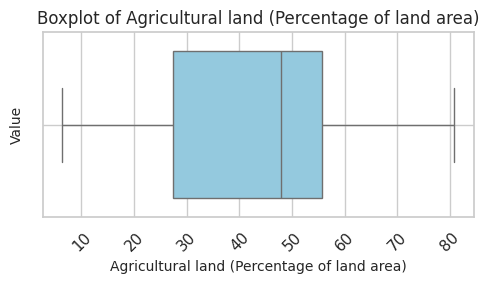

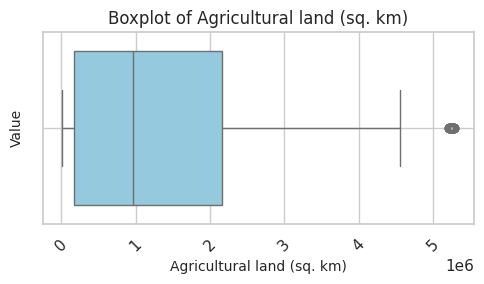

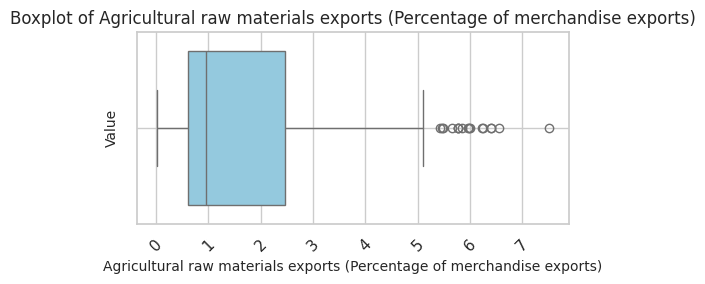

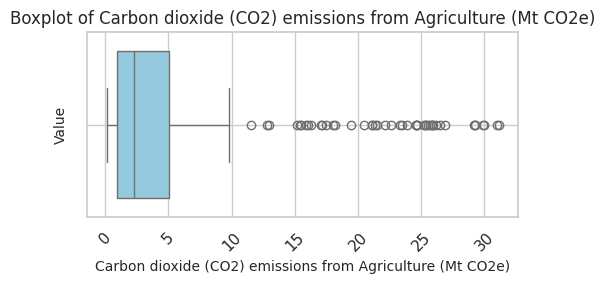

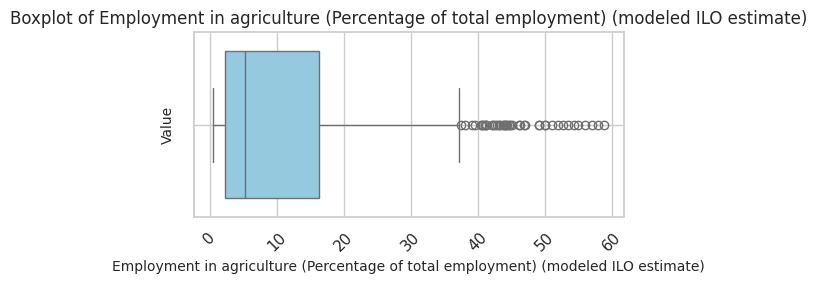

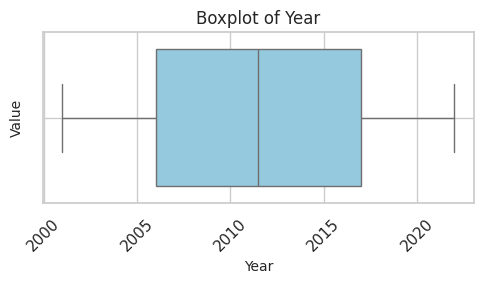

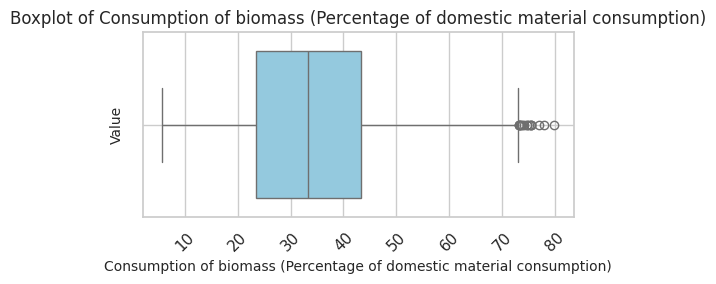

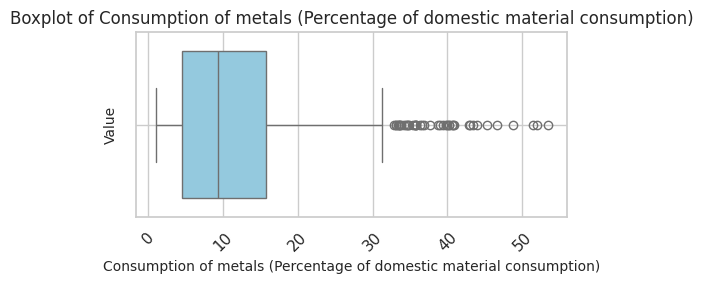

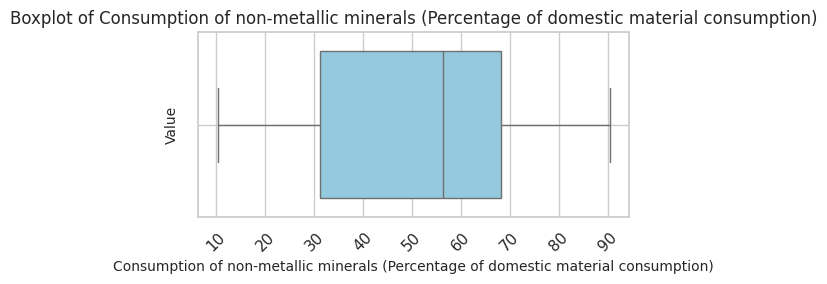

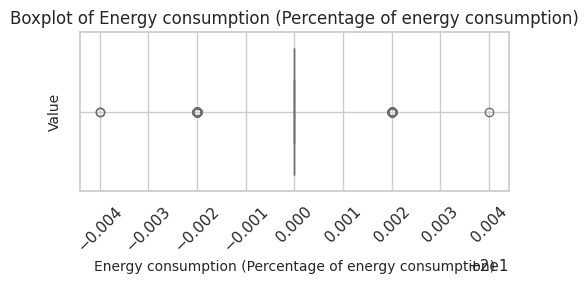

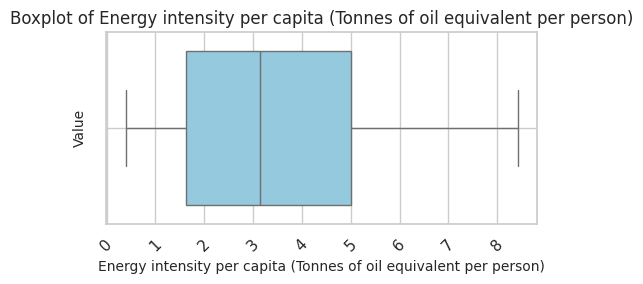

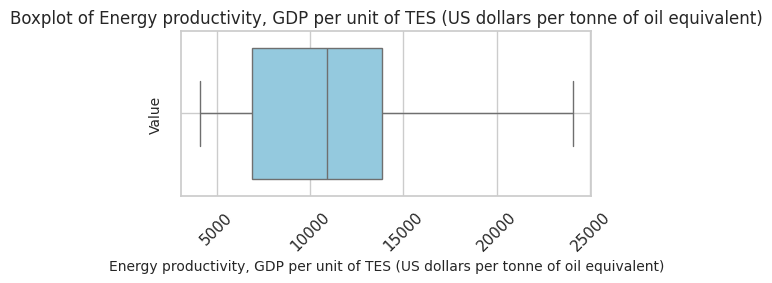

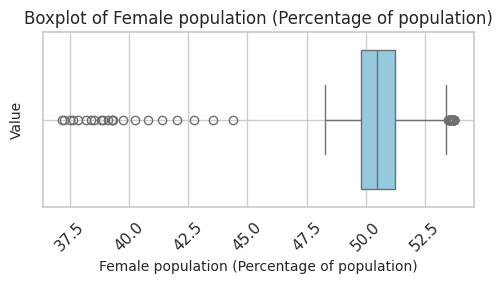

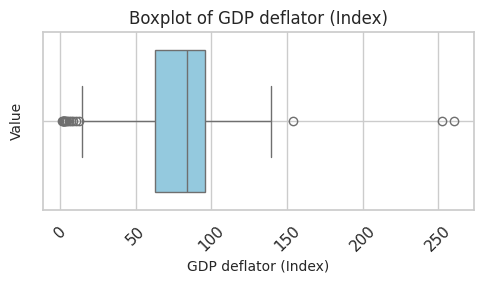

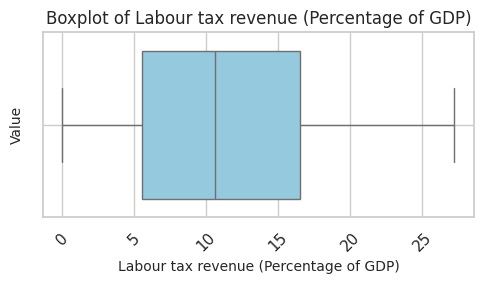

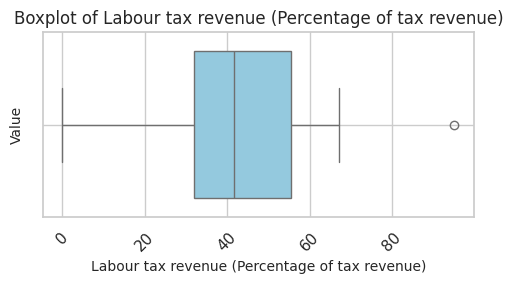

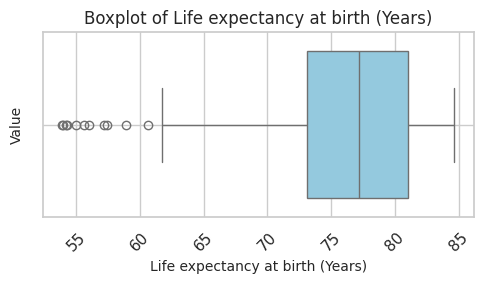

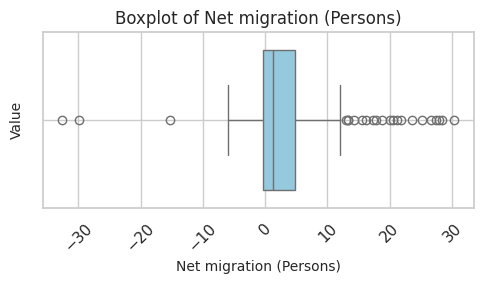

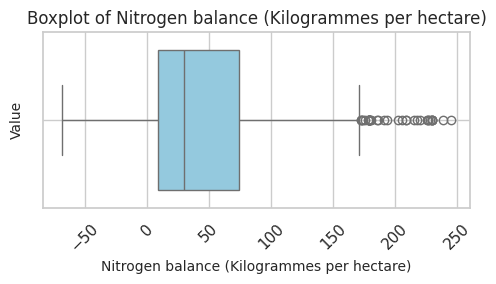

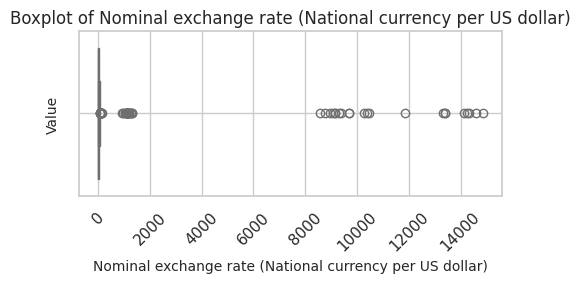

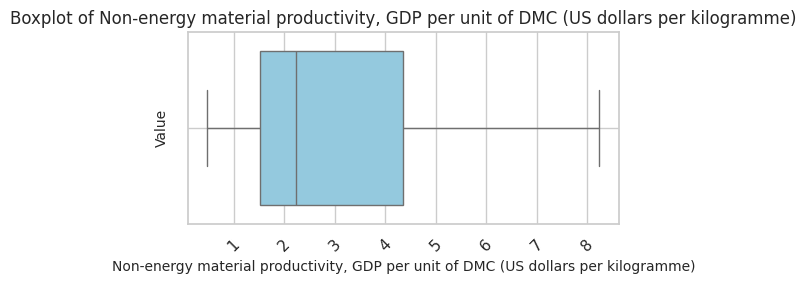

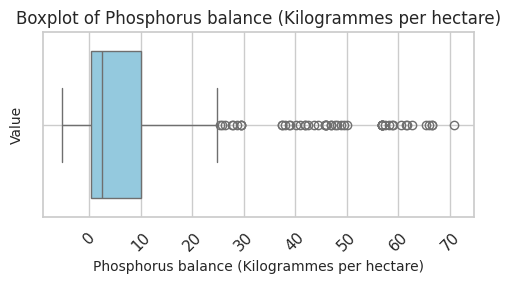

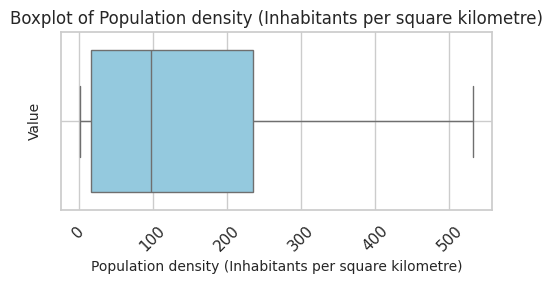

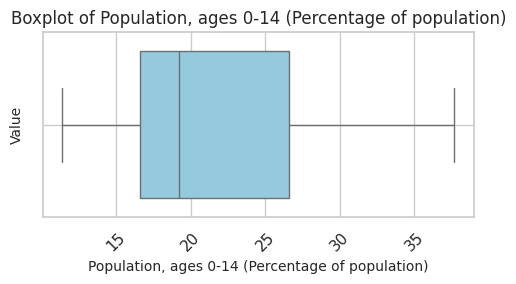

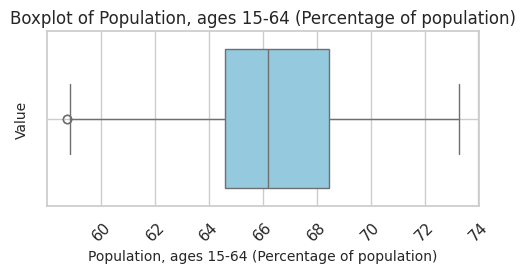

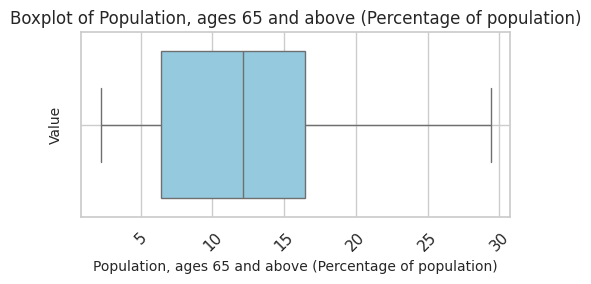

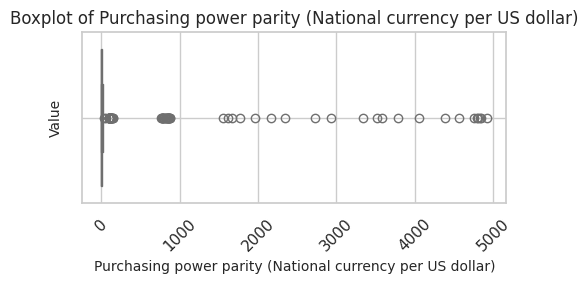

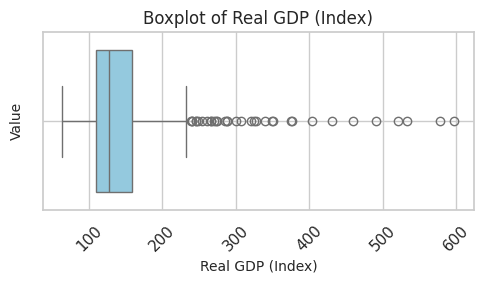

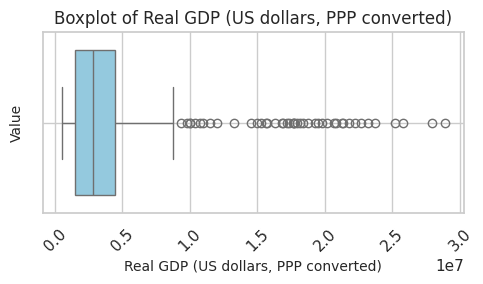

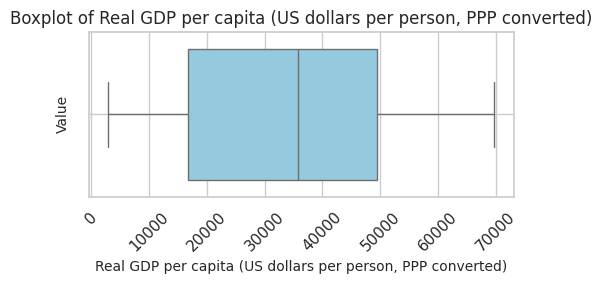

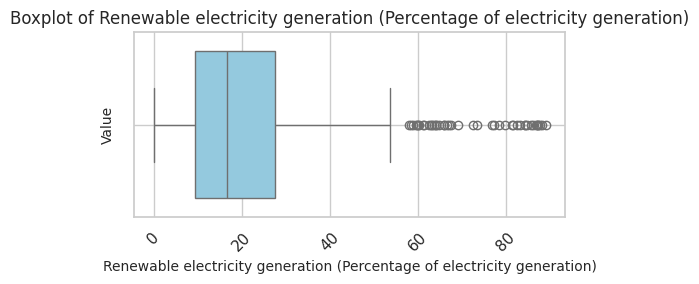

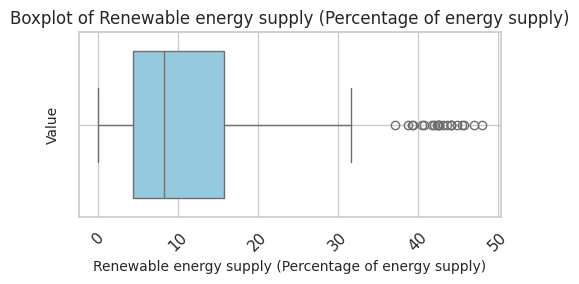

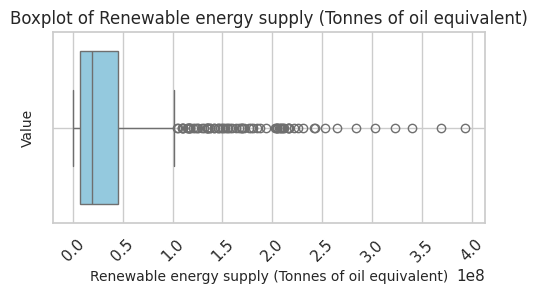

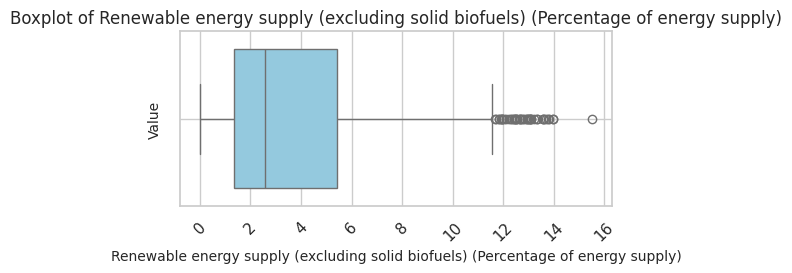

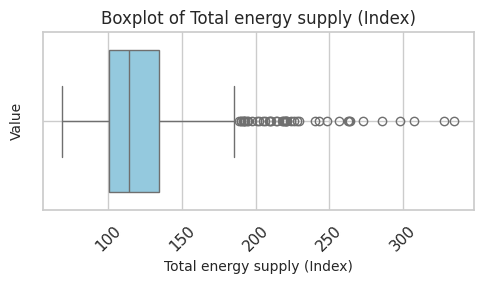

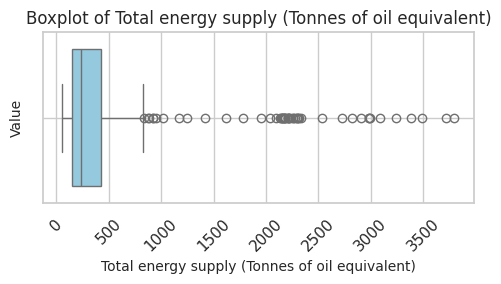

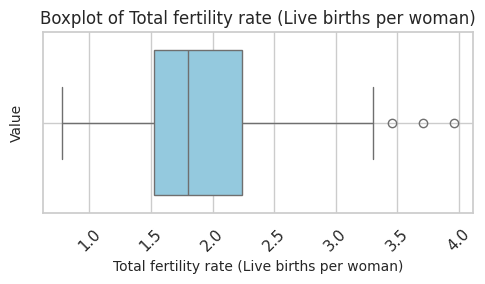

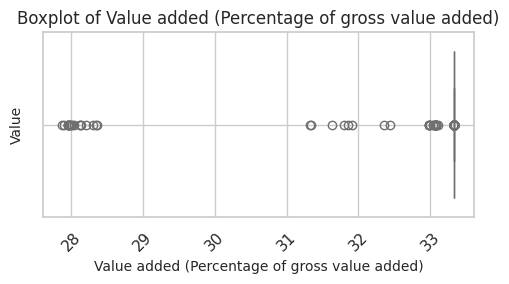

In [33]:
# memilih feature numerik
numerical_cols = df.select_dtypes(include=['number']).columns

# mengatur gaya visualisasi menggunakan grid putih untuk tampilan yang bersih
sns.set(style="whitegrid")

# melakukan iterasi untuk membuat boxplot untuk setiap feature numerik
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print()

> **Insight**:
- Kode ini secara efektif menghasilkan visualisasi distribusi untuk semua kolom numerik dalam DataFrame. Visualisasi ini memberikan wawasan tentang penyebaran data, kuartil, dan outlier, yang sangat penting untuk langkah-langkah analisis data lebih lanjut, seperti pra-pemrosesan atau pemodelan.
- Penggunaan boxplot dengan grid putih dan warna yang ringan memastikan grafik yang bersih dan mudah dipahami, memungkinkan pengguna untuk dengan cepat menangkap informasi kunci dari distribusi data numerik.

### **Imbalances**

In [34]:
# menampilkan jumlah kemunculan setiap nilai di feature
df['Country'].value_counts()

Country
Argentina         22
Australia         22
Brazil            22
Canada            22
China             22
France            22
Germany           22
India             22
Indonesia         22
Italy             22
Japan             22
Mexico            22
Russia            22
Saudi Arabia      22
South Africa      22
South Korea       22
Türkiye           22
United Kingdom    22
United States     22
Name: count, dtype: int64

> **Insight**:
- Dari hasil pengecekan di atas, data menunjukkan distribusi yang merata di antara 19 negara anggota G20, masing-masing memiliki 22 entri, yang mana hasil ini membuktikan bahwa datanya seimbang atau balance.

### **Negative Values**

In [35]:
# melakukan iterasi berdasarkan kolom numerik dan memeriksa nilai negatif
for col in df.select_dtypes(include=np.number).columns:
    if (df[col] < 0).any():
        print(f"Kolom '{col}' berisi nilai negatif.")
        # menghapus kolom jika memiliki nilai negatif
        df.drop(col, axis=1, inplace=True)
        print(f"Kolom '{col}' dihapus.")
    else:
        print(f"Kolom '{col}' tidak berisi nilai negatif.")

# menampilkan beberapa feature pertama dari DataFrame
df.head()

Kolom 'Agricultural land (Percentage of land area)' tidak berisi nilai negatif.
Kolom 'Agricultural land (sq. km)' tidak berisi nilai negatif.
Kolom 'Agricultural raw materials exports (Percentage of merchandise exports)' tidak berisi nilai negatif.
Kolom 'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)' tidak berisi nilai negatif.
Kolom 'Employment in agriculture (Percentage of total employment) (modeled ILO estimate)' tidak berisi nilai negatif.
Kolom 'Year' tidak berisi nilai negatif.
Kolom 'Consumption of biomass (Percentage of domestic material consumption)' tidak berisi nilai negatif.
Kolom 'Consumption of metals (Percentage of domestic material consumption)' tidak berisi nilai negatif.
Kolom 'Consumption of non-metallic minerals (Percentage of domestic material consumption)' tidak berisi nilai negatif.
Kolom 'Energy consumption (Percentage of energy consumption)' tidak berisi nilai negatif.
Kolom 'Energy intensity per capita (Tonnes of oil equivalent per person)' tidak

Country  Agricultural land (Percentage of land area)  \
0  Argentina                                    46.993266   
1  Argentina                                    47.031268   
2  Argentina                                    47.174981   
3  Argentina                                    47.318695   
4  Argentina                                    47.473737   

   Agricultural land (sq. km)  \
0                   1286060.0   
1                   1287100.0   
2                   1291033.0   
3                   1294966.0   
4                   1299209.0   

   Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                           1.612160                        
1                                           1.550192                        
2                                           1.516745                        
3                                           1.629307                        
4                                           1.362289                        

   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                             0.8690           
1                                             0.8453           
2                                             1.1625           
3                                             1.3602           
4                                             1.0349           

   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                           1.065900                                   
1                                           1.061939                                   
2                                           1.021523                                   
3                                           0.969933                                   
4                                           0.919946                                   

   Year  Consumption of biomass (Percentage of domestic material consumption)  \
0  2001                                              76.94                      
1  2002                                              79.88                      
2  2003                                              77.95                      
3  2004                                              75.53                      
4  2005                                              74.80                      

   Consumption of metals (Percentage of domestic material consumption)  \
0                                               9.34                     
1                                               9.78                     
2                                               9.08                     
3                                               8.40                     
4                                               8.14                     

   Consumption of non-metallic minerals (Percentage of domestic material consumption)  \
0                                              13.72                                    
1                                              10.34                                    
2                                              12.96                                    
3                                              16.07                                    
4                                              17.06                                    

   ...  Real GDP (US dollars, PPP converted)  \
0  ...                            1245343.38   
1  ...                             952326.69   
2  ...                             861060.75   
3  ...                             786012.00   
4  ...                             855587.12   

   Real GDP per capita (US dollars per person, PPP converted)  \
0                                           33516.03            
1                                           25369.82            
2                                           22702.83            
3                                           20

> **Insight**:
- Kode ini memberikan pendekatan yang langsung untuk menghapus kolom dengan nilai negatif, yang berguna dalam beberapa kasus ketika nilai negatif tidak diinginkan. Namun, pendekatan ini dapat berisiko kehilangan informasi yang mungkin penting. Oleh karena itu, lebih baik untuk memeriksa dan menangani nilai negatif (misalnya, dengan imputasi atau penggantian) daripada langsung menghapus kolom tanpa pertimbangan lebih lanjut.

## **Data Filtering**

In [36]:
# Menampilkan kolom yang relevan untuk analisis
df = df[
    [
        'Year',
        'Country',
        'Agricultural land (Percentage of land area)',
        'Agricultural land (sq. km)',
        'Agricultural raw materials exports (Percentage of merchandise exports)',
        'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
        'Employment in agriculture (Percentage of total employment) (modeled ILO estimate)',
        'Real GDP (US dollars, PPP converted)',
        'Value added (Percentage of gross value added)',
        'Labour tax revenue (Percentage of GDP)',
        'Labour tax revenue (Percentage of tax revenue)',
        'Real GDP per capita (US dollars per person, PPP converted)',
        'Nominal exchange rate (National currency per US dollar)',
        'Purchasing power parity (National currency per US dollar)',
        'Female population (Percentage of population)',
        'Population, ages 0-14 (Percentage of population)',
        'Population, ages 15-64 (Percentage of population)',
        'Population, ages 65 and above (Percentage of population)',
        'Total fertility rate (Live births per woman)',
        'Life expectancy at birth (Years)',
        'Population density (Inhabitants per square kilometre)',
        'Energy productivity, GDP per unit of TES (US dollars per tonne of oil equivalent)',
        'Energy intensity per capita (Tonnes of oil equivalent per person)',
        'Total energy supply (Tonnes of oil equivalent)',
        'Renewable energy supply (Percentage of energy supply)',
        'Renewable energy supply (Tonnes of oil equivalent)',
        'Renewable electricity generation (Percentage of electricity generation)',
        'Energy consumption (Percentage of energy consumption)',
        'Renewable energy supply (excluding solid biofuels) (Percentage of energy supply)',
        'Non-energy material productivity, GDP per unit of DMC (US dollars per kilogramme)',
        'Consumption of biomass (Percentage of domestic material consumption)',
        'Consumption of non-metallic minerals (Percentage of domestic material consumption)',
        'Consumption of metals (Percentage of domestic material consumption)',
    ]
]

# menampilkan beberapa feature pertama dari DataFrame
df.head()

Year    Country  Agricultural land (Percentage of land area)  \
0  2001  Argentina                                    46.993266   
1  2002  Argentina                                    47.031268   
2  2003  Argentina                                    47.174981   
3  2004  Argentina                                    47.318695   
4  2005  Argentina                                    47.473737   

   Agricultural land (sq. km)  \
0                   1286060.0   
1                   1287100.0   
2                   1291033.0   
3                   1294966.0   
4                   1299209.0   

   Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                           1.612160                        
1                                           1.550192                        
2                                           1.516745                        
3                                           1.629307                        
4                                           1.362289                        

   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                             0.8690           
1                                             0.8453           
2                                             1.1625           
3                                             1.3602           
4                                             1.0349           

   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                           1.065900                                   
1                                           1.061939                                   
2                                           1.021523                                   
3                                           0.969933                                   
4                                           0.919946                                   

   Real GDP (US dollars, PPP converted)  \
0                            1245343.38   
1                             952326.69   
2                             861060.75   
3                             786012.00   
4                             855587.12   

   Value added (Percentage of gross value added)  \
0                                      31.630000   
1                                      31.850000   
2                                      31.336667   
3                                      28.340000   
4                                      28.353333   

   Labour tax revenue (Percentage of GDP)  ...  \
0                                    2.54  ...   
1                                    2.54  ...   
2                                    3.21  ...   
3                                    4.08  ...   
4                                    4.39  ...   

   Total energy supply (Tonnes of oil equivalent)  \
0                                           57.13   
1                                           56.44   
2                                           61.06   
3                                           67.58   
4                                           67.16   

   Renewable energy supply (Percentage of energy supply)  \
0                                              10.42       
1                                              10.14       
2                                               9.50       
3                                               7.91       
4                                               8.71       

   Renewable energy supply (Tonnes of oil equivalent)  \
0                                          5955087.3    
1                                          5721195.2    
2                                          5797573.3    
3                                          5346465.0    
4                                          5846641.9    

   Renewable electricity generation (Percentage of electricity generation)  \
0                                              51.

> **Insight**:
- Kode ini menyaring DataFrame untuk hanya mencakup kolom yang relevan untuk analisis mendalam tentang sektor pertanian, ekonomi, energi, dan demografi. Hal ini penting untuk menjaga fokus analisis dan mempermudah pemahaman.
- Dengan mengeliminasi kolom yang tidak relevan, analisis bisa lebih terarah, mengurangi kompleksitas dan meningkatkan pemahaman tentang bagaimana berbagai faktor saling berinteraksi, terutama dalam konteks ekonomi, energi, dan keberlanjutan.

## **Exploration Data Analysis**

### **Data Statistics**

In [37]:
# membuat salinan untuk eksplorasi data
df_eda = df.copy()

# menampilkan beberapa instance pertama dari DataFrame
df_eda.head()

Year    Country  Agricultural land (Percentage of land area)  \
0  2001  Argentina                                    46.993266   
1  2002  Argentina                                    47.031268   
2  2003  Argentina                                    47.174981   
3  2004  Argentina                                    47.318695   
4  2005  Argentina                                    47.473737   

   Agricultural land (sq. km)  \
0                   1286060.0   
1                   1287100.0   
2                   1291033.0   
3                   1294966.0   
4                   1299209.0   

   Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                           1.612160                        
1                                           1.550192                        
2                                           1.516745                        
3                                           1.629307                        
4                                           1.362289                        

   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                             0.8690           
1                                             0.8453           
2                                             1.1625           
3                                             1.3602           
4                                             1.0349           

   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                           1.065900                                   
1                                           1.061939                                   
2                                           1.021523                                   
3                                           0.969933                                   
4                                           0.919946                                   

   Real GDP (US dollars, PPP converted)  \
0                            1245343.38   
1                             952326.69   
2                             861060.75   
3                             786012.00   
4                             855587.12   

   Value added (Percentage of gross value added)  \
0                                      31.630000   
1                                      31.850000   
2                                      31.336667   
3                                      28.340000   
4                                      28.353333   

   Labour tax revenue (Percentage of GDP)  ...  \
0                                    2.54  ...   
1                                    2.54  ...   
2                                    3.21  ...   
3                                    4.08  ...   
4                                    4.39  ...   

   Total energy supply (Tonnes of oil equivalent)  \
0                                           57.13   
1                                           56.44   
2                                           61.06   
3                                           67.58   
4                                           67.16   

   Renewable energy supply (Percentage of energy supply)  \
0                                              10.42       
1                                              10.14       
2                                               9.50       
3                                               7.91       
4                                               8.71       

   Renewable energy supply (Tonnes of oil equivalent)  \
0                                          5955087.3    
1                                          5721195.2    
2                                          5797573.3    
3                                          5346465.0    
4                                          5846641.9    

   Renewable electricity generation (Percentage of electricity generation)  \
0                                              51.

> **Insight**:
- Menggunakan salinan DataFrame (`.copy()`) adalah pendekatan yang sangat baik untuk eksplorasi data karena memberi Anda kebebasan untuk memodifikasi atau mengolah data tanpa khawatir merusak data asli. Ini juga memudahkan dalam eksperimen dengan berbagai teknik pembersihan dan analisis data.
- Dengan menampilkan beberapa baris pertama menggunakan `df_eda.head()`, Anda mendapatkan gambaran cepat tentang dataset yang memudahkan Anda untuk memutuskan langkah selanjutnya dalam eksplorasi atau pembersihan data.

In [38]:
# mengatur format tampilan angka untuk tidak menggunakan notasi ilmiah
pd.options.display.float_format = '{:.2f}'.format

# menampilkan statistical five summaries
df_eda.describe().loc[['min', '25%', '50%', '75%', 'max']].T.round(2)

min        25%  \
Year                                                 2001.00    2006.00   
Agricultural land (Percentage of land area)             6.37      27.35   
Agricultural land (sq. km)                          16030.00  173796.84   
Agricultural raw materials exports (Percentage ...      0.02       0.61   
Carbon dioxide (CO2) emissions from Agriculture...      0.12       0.90   
Employment in agriculture (Percentage of total ...      0.57       2.26   
Real GDP (US dollars, PPP converted)               517330.31 1476957.32   
Value added (Percentage of gross value added)          27.88      33.33   
Labour tax revenue (Percentage of GDP)                  0.00       5.54   
Labour tax revenue (Percentage of tax revenue)          0.00      31.88   
Real GDP per capita (US dollars per person, PPP...   2965.36   16836.88   
Nominal exchange rate (National currency per US...      0.50       1.00   
Purchasing power parity (National currency per ...      0.41       0.93   
Female population (Percentage of population)           37.18      49.81   
Population, ages 0-14 (Percentage of population)       11.41      16.62   
Population, ages 15-64 (Percentage of population)      58.73      64.60   
Population, ages 65 and above (Percentage of po...      2.21       6.40   
Total fertility rate (Live births per woman)            0.78       1.52   
Life expectancy at birth (Years)                       53.91      73.08   
Population density (Inhabitants per square kilo...      2.51      16.27   
Energy productivity, GDP per unit of TES (US do...   4114.57    6888.84   
Energy intensity per capita (Tonnes of oil equi...      0.39       1.62   
Total energy supply (Tonnes of oil equivalent)         56.44     150.57   
Renewable energy supply (Percentage of energy s...      0.00       4.38   
Renewable energy supply (Tonnes of oil equivalent)   4485.60 7345920.20   
Renewable electricity generation (Percentage of...      0.00       9.47   
Energy consumption (Percentage of energy consum...     20.00      20.00   
Renewable energy supply (excluding solid biofue...      0.00       1.33   
Non-energy material productivity, GDP per unit ...      0.47       1.52   
Consumption of biomass (Percentage of domestic ...      5.70      23.37   
Consumption of non-metallic minerals (Percentag...     10.34      31.20   
Consumption of metals (Percentage of domestic m...      0.99       4.56   

                                                           50%         75%  \
Year                                                   2011.50     2017.00   
Agricultural land (Percentage of land area)              47.96       55.78   
Agricultural land (sq. km)                           963410.00  2154940.00   
Agricultural raw materials exports (Percentage ...        0.95        2.46   
Carbon dioxide (CO2) emissions from Agriculture...        2.25        5.05   
Employment in agriculture (Percentage of total ...        5.22       16.37   
Real GDP (US dollars, PPP converted)                2840137.62  4445962.88   
Value added (Percentage of gross value added)            33.33       33.33   
Labour tax revenue (Percentage of GDP)                   10.63       16.54   
Labour tax revenue (Percentage of tax revenue)           41.58       55.58   
Real GDP per capita (US dollars per person, PPP...    35852.82    49462.94   
Nominal exchange rate (National currency per US...        3.75       30.80   
Purchasing power parity (National currency per ...        1.70       11.69   
Female population (Percentage of population)             50.46       51.25   
Population, ages 0-14 (Percentage of population)         19.22       26.60   
Population, ages 15-64 (Percentage of population)        66.20       68.44   
Population, ages 65 and above (Percentage of po...       12.10       16.47   
Total fertility rate (Live births per woman)              1.80        2.24   
Life expectancy at birth (Years)                         77.18       81.06   
Population density (I

> **Insight**:
- Pengaturan tampilan angka dengan dua desimal membantu untuk menghindari kebingungannya tampilan angka dalam notasi ilmiah, membuat hasil lebih mudah dipahami, terutama bagi pembaca yang tidak terbiasa dengan format tersebut.
- Ringkasan statistik lima angka memberikan gambaran yang jelas tentang distribusi data. Dengan dua angka desimal, ini akan lebih mudah untuk menganalisis nilai-nilai tersebut (misalnya, apakah ada data yang sangat besar atau kecil yang perlu ditangani lebih lanjut).

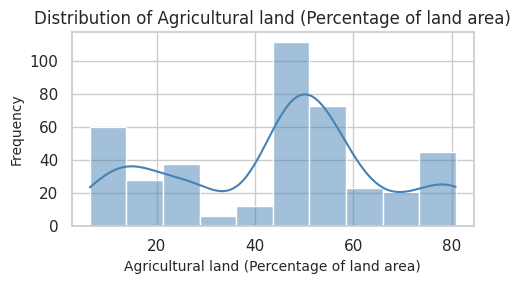

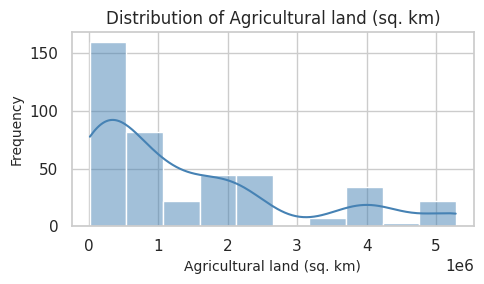

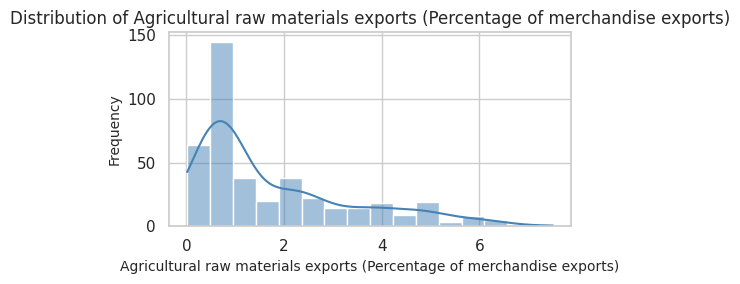

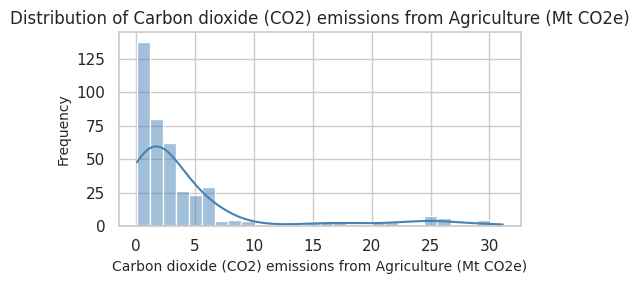

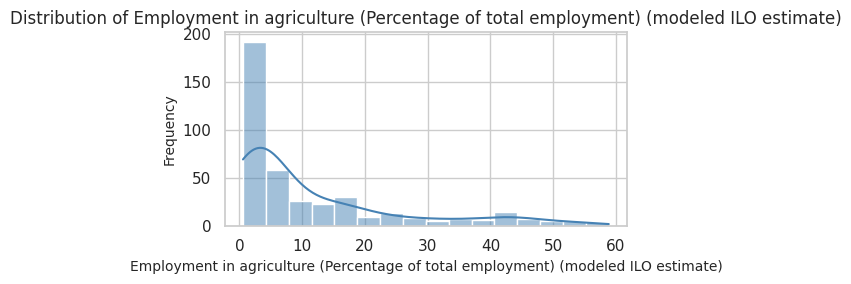

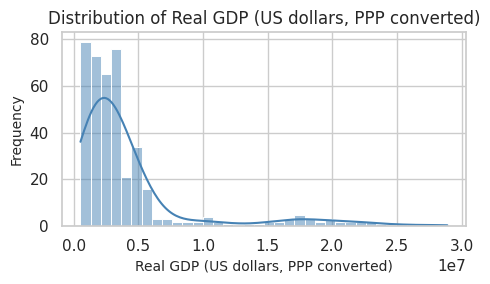

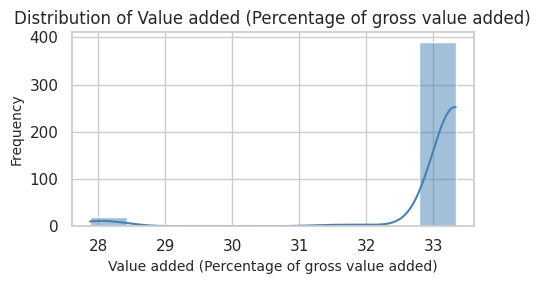

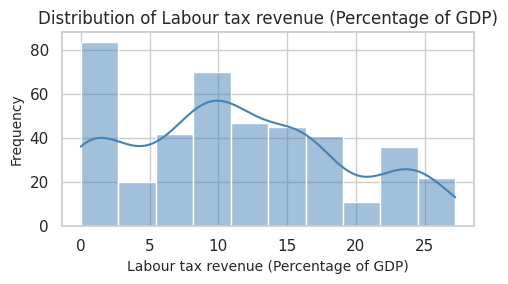

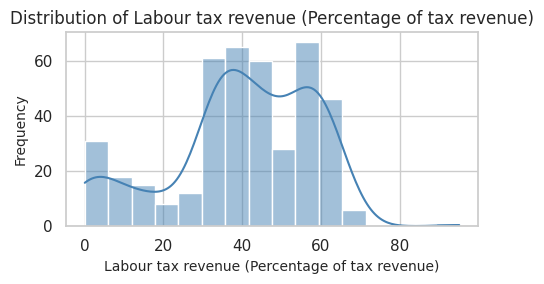

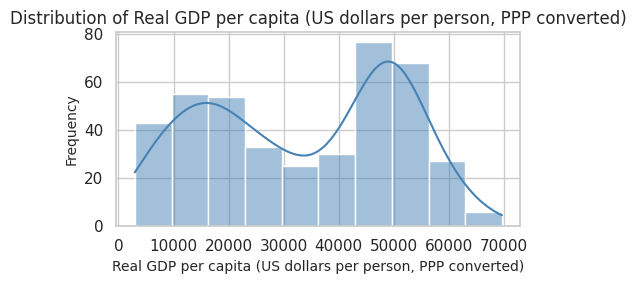

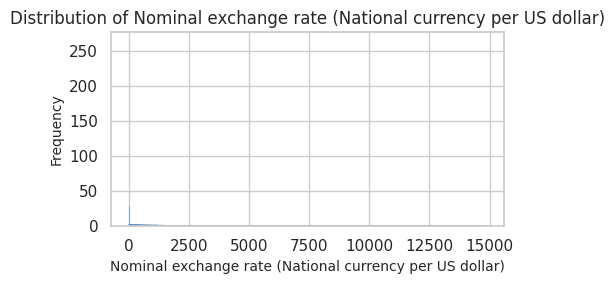

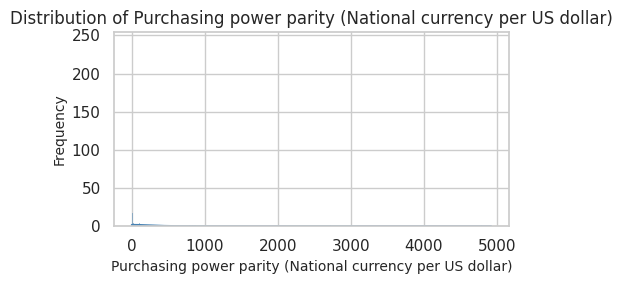

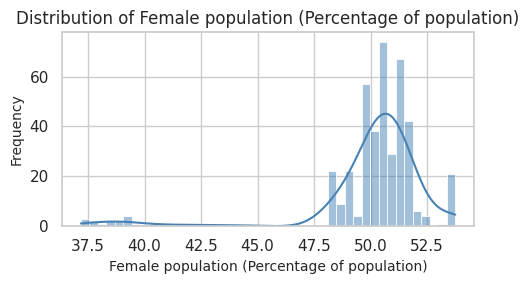

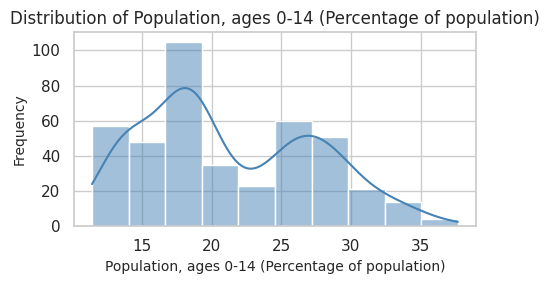

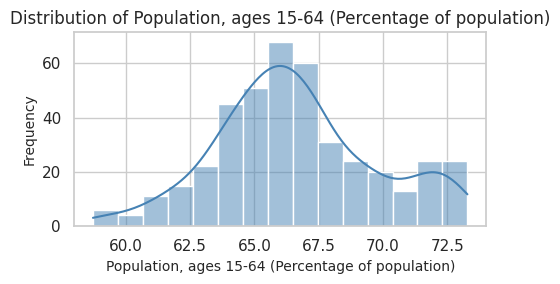

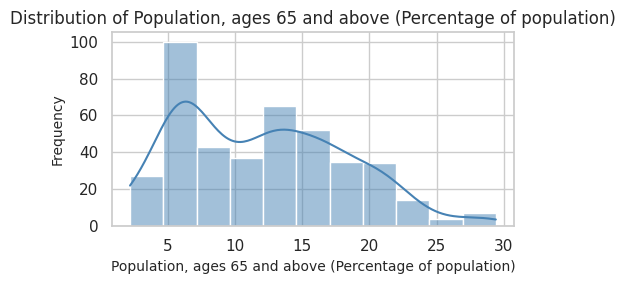

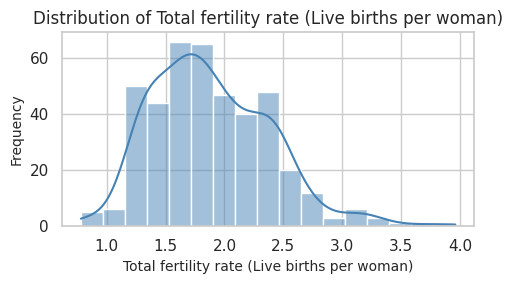

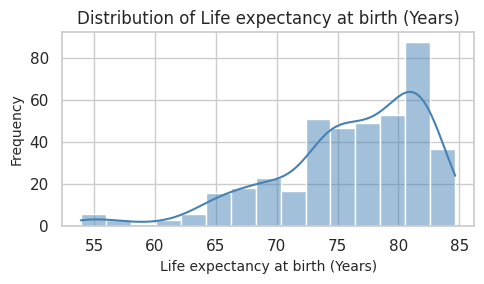

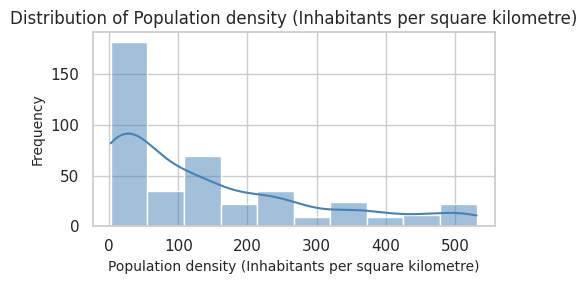

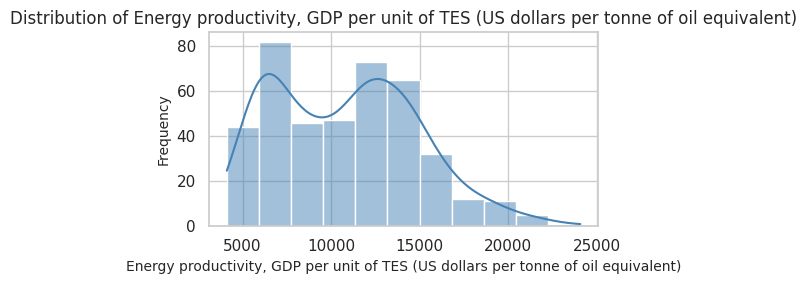

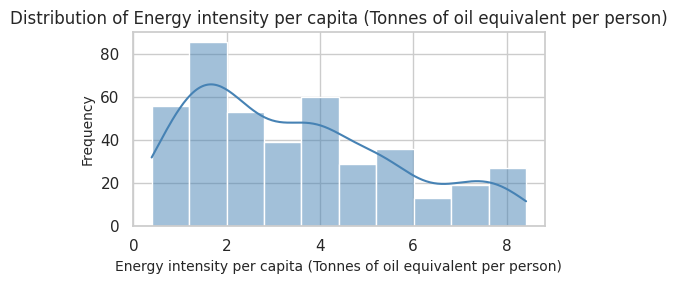

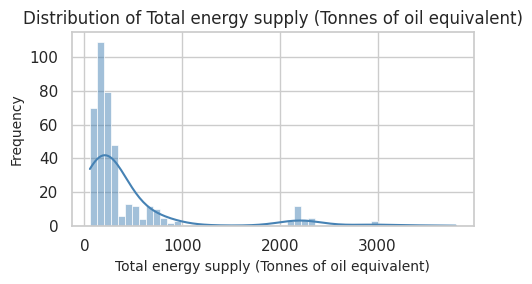

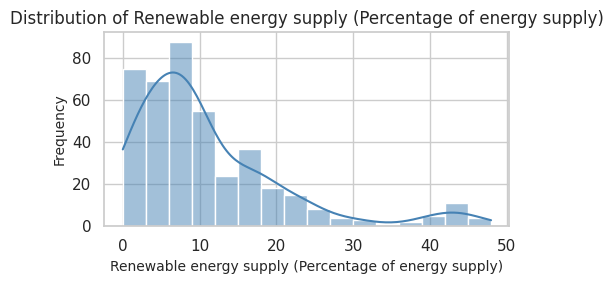

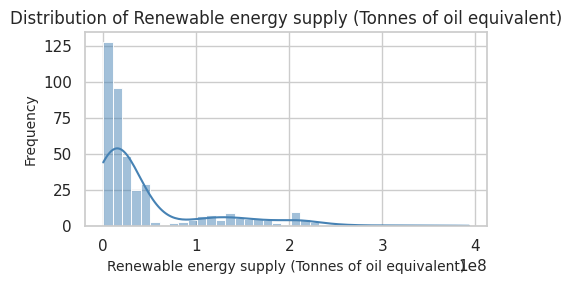

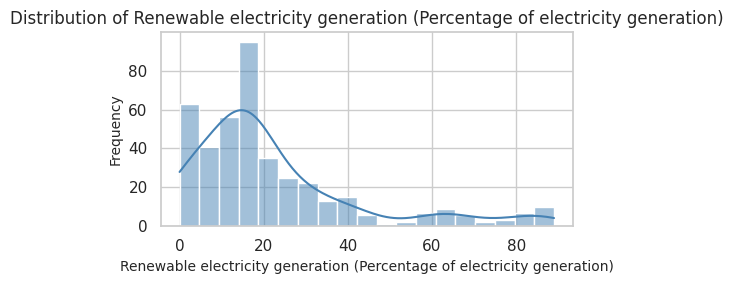

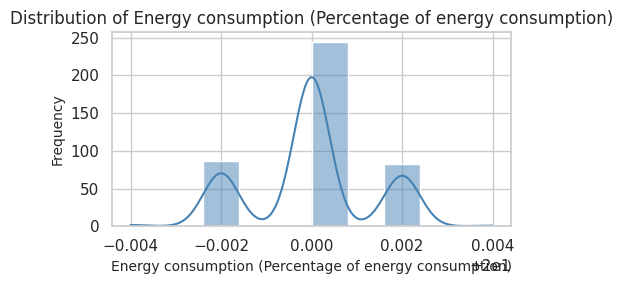

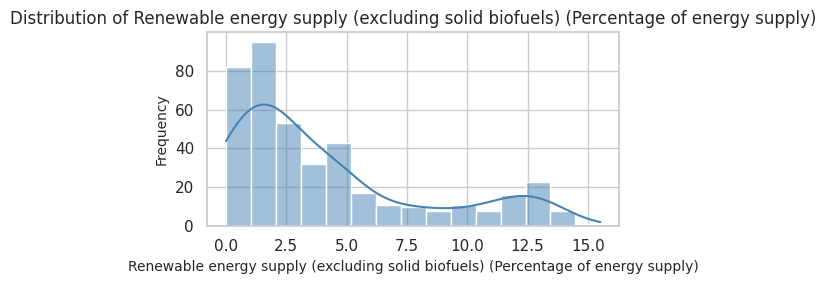

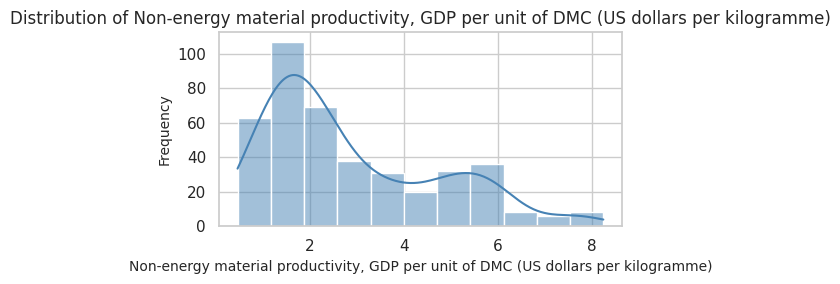

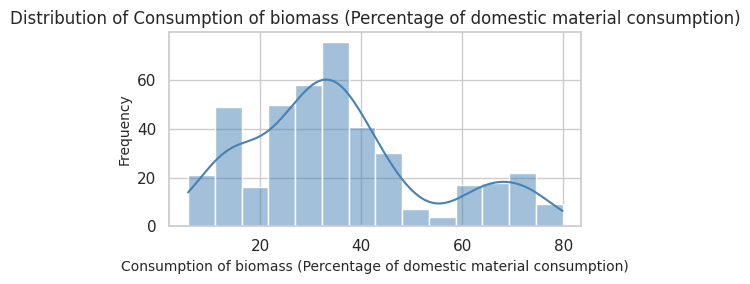

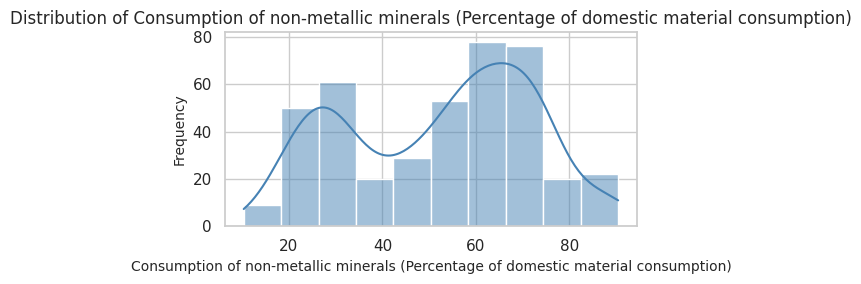

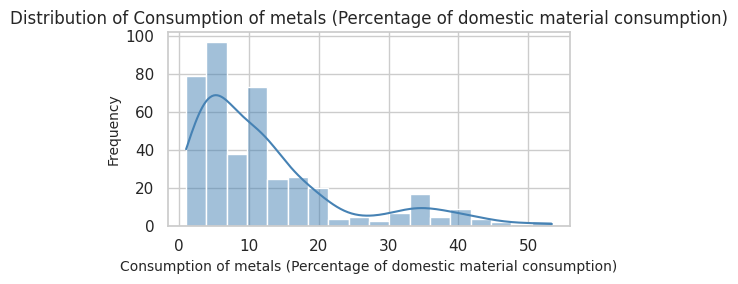

In [39]:
# memilih feature numerik untuk analisis distribusi
numerical_cols = df_eda.select_dtypes(include=['float64']).columns

# mengatur gaya visualisasi menggunakan grid putih untuk tampilan yang bersih
sns.set(style="whitegrid")

# membuat histogram untuk setiap feature numerik
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df_eda[col], kde=True, bins='auto', color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.tight_layout()
    plt.show()
    print()

> **Insight**:
- Kode ini digunakan untuk memvisualisasikan distribusi data numerik dalam dataset dengan menggunakan histogram dan Kernel Density Estimation (KDE) untuk setiap kolom bertipe float64. Visualisasi ini membantu dalam memahami distribusi data, mengidentifikasi puncak, penyebaran, serta potensi ketidakteraturan dalam data.

### **Bivariate Analysis**

#### **Agricultural Context: Agricultural land (Percentage of land area) vs. Employment in agriculture (Percentage of total employment)**

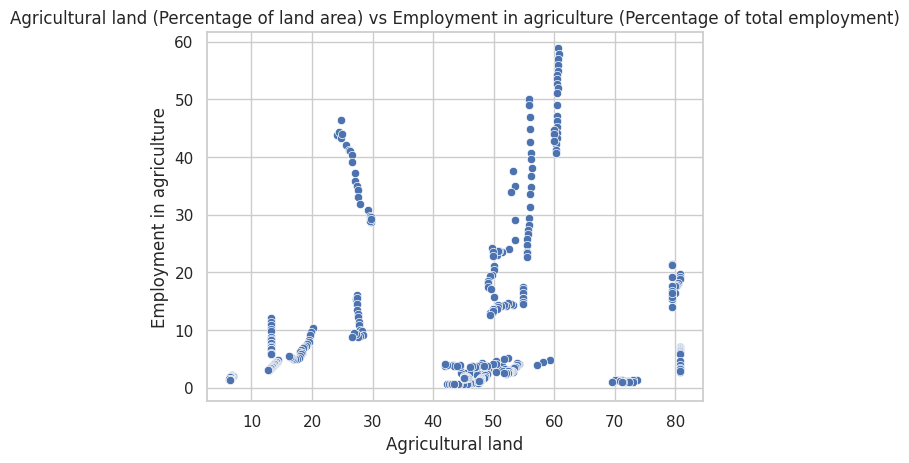

Pearson correlation coefficient: 0.1585648495729242


In [40]:
# scatter plot
sns.scatterplot(data=df_eda, x='Agricultural land (Percentage of land area)', y='Employment in agriculture (Percentage of total employment) (modeled ILO estimate)')
plt.title('Agricultural land (Percentage of land area) vs Employment in agriculture (Percentage of total employment)')
plt.xlabel('Agricultural land')
plt.ylabel('Employment in agriculture')
plt.show()

# korelasi
corr, _ = pearsonr(df_eda['Agricultural land (Percentage of land area)'], df_eda['Employment in agriculture (Percentage of total employment) (modeled ILO estimate)'])
print(f"Pearson correlation coefficient: {corr}")

> **Insight**: Jika hasil korelasi menunjukkan hubungan positif, maka kita dapat menyimpulkan bahwa semakin besar persentase luas lahan pertanian, semakin tinggi persentase pekerjaan di sektor pertanian. Hal ini mungkin disebabkan oleh ketergantungan pada sektor pertanian sebagai sumber utama mata pencaharian di negara atau wilayah tersebut.

#### **Economic Context: Real GDP (US dollars) vs Labour tax revenue (Percentage of GDP)**

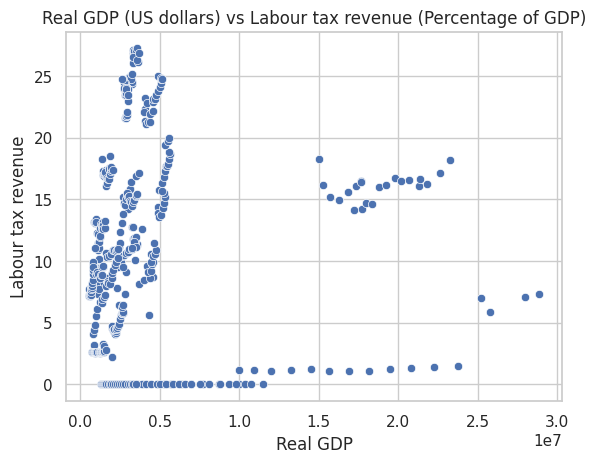

Pearson correlation coefficient: -0.0018152257368745303


In [41]:
# scatter plot
sns.scatterplot(data=df_eda, x='Real GDP (US dollars, PPP converted)', y='Labour tax revenue (Percentage of GDP)')
plt.title('Real GDP (US dollars) vs Labour tax revenue (Percentage of GDP)')
plt.xlabel('Real GDP')
plt.ylabel('Labour tax revenue')
plt.show()

# korelasi
corr, _ = pearsonr(df_eda['Real GDP (US dollars, PPP converted)'], df_eda['Labour tax revenue (Percentage of GDP)'])
print(f"Pearson correlation coefficient: {corr}")

> **Insight**: Jika hasil korelasi rendah, mungkin ada faktor lain yang lebih berpengaruh terhadap pendapatan pajak tenaga kerja, seperti kebijakan perpajakan atau tingkat penghindaran pajak.

#### **Energy Efficiency: Total energy supply (Tonnes of oil equivalent) vs. Energy intensity per capita (Tonnes of oil equivalent per person)**

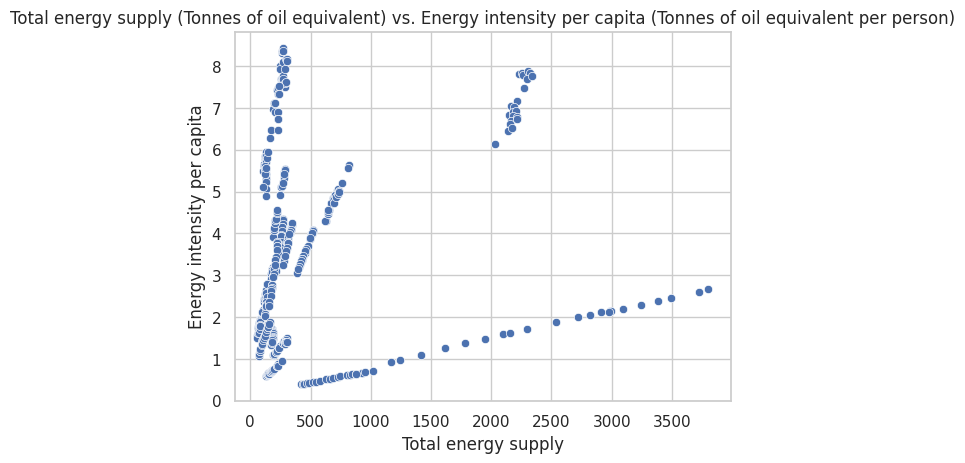

Pearson correlation coefficient: 0.1453099363483475


In [42]:
# scatter plot
sns.scatterplot(data=df_eda, x='Total energy supply (Tonnes of oil equivalent)', y='Energy intensity per capita (Tonnes of oil equivalent per person)')
plt.title('Total energy supply (Tonnes of oil equivalent) vs. Energy intensity per capita (Tonnes of oil equivalent per person)')
plt.xlabel('Total energy supply')
plt.ylabel('Energy intensity per capita')
plt.show()

# korelasi
corr, _ = pearsonr(df_eda['Total energy supply (Tonnes of oil equivalent)'], df_eda['Energy intensity per capita (Tonnes of oil equivalent per person)'])
print(f"Pearson correlation coefficient: {corr}")

> **Insight**: Jika hasil korelasi positif, maka bisa disimpulkan bahwa negara dengan pasokan energi yang lebih besar cenderung memiliki energi intensitas per kapita yang lebih tinggi. Ini mungkin menunjukkan bahwa meskipun energi lebih banyak tersedia, tidak semua sumber daya energi digunakan secara efisien.

#### **Social Context: Population density (Inhabitants per square kilometre) vs. Life expectancy at birth (Years)**

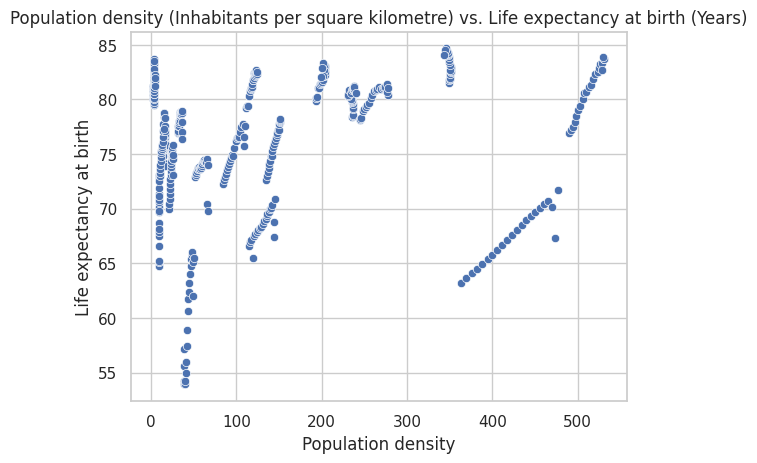

Pearson correlation coefficient: 0.20113968957695605


In [43]:
# scatter plot
sns.scatterplot(data=df_eda, x='Population density (Inhabitants per square kilometre)', y='Life expectancy at birth (Years)')
plt.title('Population density (Inhabitants per square kilometre) vs. Life expectancy at birth (Years)')
plt.xlabel('Population density')
plt.ylabel('Life expectancy at birth')
plt.show()

# korelasi
corr, _ = pearsonr(df_eda['Population density (Inhabitants per square kilometre)'], df_eda['Life expectancy at birth (Years)'])
print(f"Pearson correlation coefficient: {corr}")

> **Insight**: Jika korelasi positif ditemukan, mungkin ada faktor-faktor lain yang mendukung kesehatan masyarakat meskipun kepadatan penduduk tinggi, seperti infrastruktur kesehatan yang baik atau kebijakan yang mendukung kualitas hidup.

#### **Agricultural Context and Environmental Productivity: Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e) vs. Non-energy material productivity, GDP per unit of DMC (US dollars per kilogramme)**

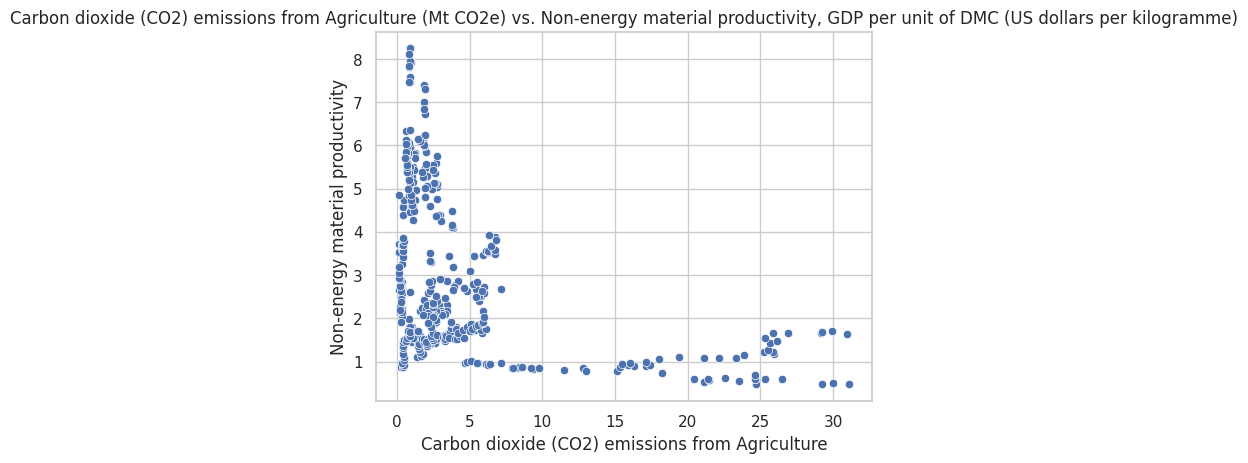

Pearson correlation coefficient: -0.4237782460185802


In [44]:
# scatter plot
sns.scatterplot(data=df_eda, x='Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)', y='Non-energy material productivity, GDP per unit of DMC (US dollars per kilogramme)')
plt.title('Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e) vs. Non-energy material productivity, GDP per unit of DMC (US dollars per kilogramme)')
plt.xlabel('Carbon dioxide (CO2) emissions from Agriculture')
plt.ylabel('Non-energy material productivity')
plt.show()

# korelasi
corr, _ = pearsonr(df_eda['Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)'], df_eda['Non-energy material productivity, GDP per unit of DMC (US dollars per kilogramme)'])
print(f"Pearson correlation coefficient: {corr}")

> **Insight**: Jika korelasi negatif ditemukan, ini mungkin menunjukkan bahwa negara dengan tingkat emisi CO2 tinggi cenderung memiliki peningkatan produktivitas material non-energi, mungkin karena pendekatan pertanian yang lebih modern dan efisien.

### **Multivariate Analysis**

#### **Comparison of Agricultural Land and Agricultural Raw Material Exports in Each G20 Member Country**

In [45]:
# kolom pertanian
agricultural_col = [
    'Agricultural land (Percentage of land area)',
    'Agricultural raw materials exports (Percentage of merchandise exports)'
]

# rata-rata
avg_renewable_energy = df_eda.groupby('Country')[agricultural_col].mean()
avg_renewable_energy = avg_renewable_energy.sort_values(by=agricultural_col[0], ascending=False)

fig = go.Figure()
colors = ['darkgreen', 'yellowgreen']
for i, col in enumerate(agricultural_col):
    fig.add_trace(go.Bar(
        x=avg_renewable_energy.index,
        y=avg_renewable_energy[col],
        name=col,
        marker_color=colors[i],
        text=avg_renewable_energy[col].apply(lambda x: f'{x:.2f}'),
        textposition='outside'
    ))

# membuat layout
fig.update_layout(
    title={
        'text': 'Perbandingan Lahan Pertanian dan Ekspor Bahan Baku Pertanian di Setiap Negara Anggota G20',
        'font': {'size': 18, 'color': 'black', 'weight': 'bold'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Negara',
    yaxis_title='Lahan Pertanian dan Ekspor Bahan Baku Pertanian (%)',
    barmode='group',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=0.95,
        xanchor='center',
        x=0.5
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=60, b=40, l=40, r=40),
    height=500
)

fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.show()

> **Insight**:
- Kode ini digunakan untuk membuat visualisasi perbandingan antara dua kolom terkait pertanian, yaitu persentase lahan pertanian dan ekspor bahan baku pertanian, di setiap negara anggota G20. Visualisasi ini membantu untuk membandingkan kontribusi pertanian dari masing-masing negara dalam bentuk persentase, memberikan gambaran yang jelas tentang lahan pertanian dan ekspor bahan baku pertanian di negara-negara tersebut.

#### **Job Trends in Agriculture in G20 Member Countries**

In [46]:
employment_in_agriculture_data = df_eda[['Country', 'Year', 'Employment in agriculture (Percentage of total employment) (modeled ILO estimate)']]

fig = go.Figure()

# membuat daftar warna untuk setiap negara berdasarkan jumlah negara unik
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#9e0e2b', '#8b008b', '#7fffd4', '#ff1493', '#ff6347', '#40e0d0', '#ff00ff', '#ff4500', '#ffa500', '#da70d6']

# menetapkan warna unik untuk setiap negara
for idx, country in enumerate(employment_in_agriculture_data['Country'].unique()):
    country_data = employment_in_agriculture_data[employment_in_agriculture_data['Country'] == country]

    # menetapkan warna unik dari daftar warna
    color = colors[idx % len(colors)]

    # memberikan trace untuk tiap negara
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['Employment in agriculture (Percentage of total employment) (modeled ILO estimate)'],
        mode='lines',
        name=country,
        line=dict(color=color, width=2)  # setiap negara memiliki warna yang berbeda
    ))

# styling layout
fig.update_layout(
    title={
        'text': 'Tren Pekerjaan di Bidang Pertanian di Negara Anggota G20',
        'font': {'size': 18, 'color': 'black', 'weight': 'bold'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Tahun',
    yaxis_title='Pekerjaan di Bidang Pertanian (%)',
    legend_title='Negara',
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=True
)

fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.show()

> **Insight**:
- Kode ini digunakan untuk memvisualisasikan tren persentase pekerjaan di bidang pertanian di negara-negara anggota G20 sepanjang tahun. Visualisasi ini memberikan wawasan mengenai bagaimana tren pekerjaan di sektor pertanian berubah seiring waktu di negara-negara G20, memungkinkan perbandingan antara negara-negara tersebut dalam hal kontribusi sektor pertanian terhadap total pekerjaan.

#### **Population Distribution by Age Group for Each G20 Member Country**

In [47]:
def plot_population_pyramids(df):
    # mengelompokkan data berdasarkan negara dan tahun
    countries = df['Country'].unique()

    for country in countries:
        df_country = df[df['Country'] == country]
        if df_country.empty:
            print(f"No data found for {country}")
            continue

        year = df_country['Year'].max()  # menggunakan tahun terbaru
        df_year = df_country[df_country['Year'] == year]

        age_groups = ['Population, ages 0-14 (Percentage of population)', 'Population, ages 15-64 (Percentage of population)', 'Population, ages 65 and above (Percentage of population)']
        percentages = df_year[age_groups].values[0]

        fig = go.Figure()

        fig.add_trace(go.Bar(
            y=age_groups,
            x=percentages,
            orientation='h',
            name=f'Percentage of Population in {country}',
            marker_color=['#007bff', '#28a745', '#dc3545']
        ))

        fig.update_layout(
            title=f"Population Pyramid of {country} in {year}",
            yaxis_title='Age Groups',
            xaxis_title='Percentage of Population',
            barmode='stack',
        )
        fig.show()

plot_population_pyramids(df)

> **Insight**:
- Kode ini digunakan untuk memvisualisasikan piramida populasi berdasarkan kelompok usia untuk setiap negara dalam dataset. Fungsi ini memberi wawasan mengenai struktur demografis negara-negara yang dianalisis, memudahkan perbandingan antar negara terkait distribusi usia penduduknya.

#### **Nominal Exchange Rate and Purchasing Power Parity Trends of 5 Countries with the Lowest National Currencies per US Dollar**

In [48]:
# mengambil daftar 5 negara dengan nilai tukar nominal dan paritas daya beli (berdasarkan mata uang nasional per dolar AS terendah)
top_renewable_energy_supply = df_eda.groupby('Country')['Nominal exchange rate (National currency per US dollar)'].mean().sort_values(ascending=False).head(4).index.tolist()
top_renewable_energy_supply_excluding_solid_biofuels = df_eda.groupby('Country')['Purchasing power parity (National currency per US dollar)'].mean().sort_values(ascending=False).head(4).index.tolist()

# menggabungkan kedua daftar negara dan menghapus duplikat
tax_plot = list(set(top_renewable_energy_supply + top_renewable_energy_supply_excluding_solid_biofuels))

fig = go.Figure()

# melakukan iterasi
for country in tax_plot:
    country_data = df_eda[df_eda['Country'] == country]  # memfilter data untuk negara

    if not country_data.empty:
        # membuat plot pasokan nilai tukar nominal
        fig.add_trace(go.Scatter(
            x=country_data['Year'],
            y=country_data['Nominal exchange rate (National currency per US dollar)'],
            mode='lines',
            name=f'{country} - Nilai Tukar Nominal',
            line=dict(width=2),
            hoverinfo='text',
            hovertext=[f'{year}: {value:.2f}' for year, value in zip(country_data['Year'], country_data['Nominal exchange rate (National currency per US dollar)'])]
        ))

        # membuat plot paritas daya beli
        fig.add_trace(go.Scatter(
            x=country_data['Year'],
            y=country_data['Purchasing power parity (National currency per US dollar)'],
            mode='lines',
            name=f'{country} - Paritas Daya Beli',
            line=dict(dash='dash', width=2),
            hoverinfo='text',
            hovertext=[f'{year}: {value:.2f}' for year, value in zip(country_data['Year'], country_data['Purchasing power parity (National currency per US dollar)'])]
        ))

# membuat layout
fig.update_layout(
    title={
        'text': 'Tren Nilai Tukar Nominal dan Paritas Daya Beli 5 Negara dengan Mata uang Nasional per Dolar AS Terendah',
        'font': {'size': 18, 'color': 'black', 'weight': 'bold'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Tahun',
    yaxis_title='Jumlah Nilai Mata Uang Nasional per Dolar AS',
    legend_title='Nilai Tukar Nominal dan Paritas Daya Beli',
    height=600,
    hovermode='x unified',
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.show()


> **Insight**:
- Kode ini digunakan untuk menganalisis dan memvisualisasikan tren nilai tukar nominal dan paritas daya beli (PPP) dari 5 negara dengan nilai tukar nominal dan PPP terendah terhadap dolar AS. Ini memberikan wawasan tentang bagaimana mata uang nasional negara-negara dengan nilai tukar rendah relatif terhadap dolar AS dan bagaimana daya beli mereka berkembang dari waktu ke waktu.

#### **Renewable Energy Supply Trends 5 Countries with the Highest Renewable Energy Supply**

In [49]:
# mengambil daftar 5 negara dengan pasokan energi terbarukan tertinggi (berdasarkan persentase pasokan energi)
top_renewable_energy_supply = df_eda.groupby('Country')['Renewable energy supply (Percentage of energy supply)'].mean().sort_values(ascending=False).head(4).index.tolist()
top_renewable_energy_supply_excluding_solid_biofuels = df_eda.groupby('Country')['Renewable energy supply (excluding solid biofuels) (Percentage of energy supply)'].mean().sort_values(ascending=False).head(4).index.tolist()

# menggabungkan kedua daftar negara dan menghapus duplikat
tax_plot = list(set(top_renewable_energy_supply + top_renewable_energy_supply_excluding_solid_biofuels))

fig = go.Figure()

# melakukan iterasi
for country in tax_plot:
    country_data = df_eda[df_eda['Country'] == country]  # memfilter data untuk negara

    if not country_data.empty:
        # membuat plot pasokan pasokan energi terbarukan (termasuk biofuel padat)
        fig.add_trace(go.Scatter(
            x=country_data['Year'],
            y=country_data['Renewable energy supply (Percentage of energy supply)'],
            mode='lines',
            name=f'{country} - Pasokan energi terbarukan (termasuk biofuel padat)',
            line=dict(width=2),
            hoverinfo='text',
            hovertext=[f'{year}: {value:.2f}' for year, value in zip(country_data['Year'], country_data['Renewable energy supply (Percentage of energy supply)'])]
        ))

        # membuat plot pasokan energi terbarukan (tidak termasuk biofuel padat)
        fig.add_trace(go.Scatter(
            x=country_data['Year'],
            y=country_data['Renewable energy supply (excluding solid biofuels) (Percentage of energy supply)'],
            mode='lines',
            name=f'{country} - Pasokan energi terbarukan (tidak termasuk biofuel padat)',
            line=dict(dash='dash', width=2),
            hoverinfo='text',
            hovertext=[f'{year}: {value:.2f}' for year, value in zip(country_data['Year'], country_data['Renewable energy supply (excluding solid biofuels) (Percentage of energy supply)'])]
        ))

# membuat layout
fig.update_layout(
    title={
        'text': 'Tren Pasokan Energi Terbarukan 5 Negara dengan Pasokan Energi Terbarukan Tertinggi',
        'font': {'size': 18, 'color': 'black', 'weight': 'bold'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Tahun',
    yaxis_title='Jumlah Persentase Pasokan Energi',
    legend_title='Jenis Pasokan Energi Terbarukan',
    height=600,
    hovermode='x unified',
    plot_bgcolor='white',
    paper_bgcolor='white',
)
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.show()


> **Insight**:
- Kode ini menganalisis dan memvisualisasikan tren pasokan energi terbarukan di lima negara dengan pasokan energi terbarukan tertinggi, baik yang termasuk biofuel padat maupun yang tidak. Ini juga memungkinkan analisis perbandingan antara pasokan energi terbarukan yang lebih luas dan yang lebih terfokus pada sumber non-biofuel padat, yang dapat memberikan wawasan penting mengenai arah kebijakan energi bersih dan keberlanjutan di negara-negara tersebut.

# **Modeling and Evaluation**

In [50]:
# membuat salinan untuk clustering data
df_cluster = df.copy()

# menampilkan beberapa instance pertama dari DataFrame
df_cluster.head()

Year    Country  Agricultural land (Percentage of land area)  \
0  2001  Argentina                                        46.99   
1  2002  Argentina                                        47.03   
2  2003  Argentina                                        47.17   
3  2004  Argentina                                        47.32   
4  2005  Argentina                                        47.47   

   Agricultural land (sq. km)  \
0                  1286060.00   
1                  1287100.00   
2                  1291033.00   
3                  1294966.00   
4                  1299209.00   

   Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                               1.61                        
1                                               1.55                        
2                                               1.52                        
3                                               1.63                        
4                                               1.36                        

   Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                               0.87           
1                                               0.85           
2                                               1.16           
3                                               1.36           
4                                               1.03           

   Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                               1.07                                   
1                                               1.06                                   
2                                               1.02                                   
3                                               0.97                                   
4                                               0.92                                   

   Real GDP (US dollars, PPP converted)  \
0                            1245343.38   
1                             952326.69   
2                             861060.75   
3                             786012.00   
4                             855587.12   

   Value added (Percentage of gross value added)  \
0                                          31.63   
1                                          31.85   
2                                          31.34   
3                                          28.34   
4                                          28.35   

   Labour tax revenue (Percentage of GDP)  ...  \
0                                    2.54  ...   
1                                    2.54  ...   
2                                    3.21  ...   
3                                    4.08  ...   
4                                    4.39  ...   

   Total energy supply (Tonnes of oil equivalent)  \
0                                           57.13   
1                                           56.44   
2                                           61.06   
3                                           67.58   
4                                           67.16   

   Renewable energy supply (Percentage of energy supply)  \
0                                              10.42       
1                                              10.14       
2                                               9.50       
3                                               7.91       
4                                               8.71       

   Renewable energy supply (Tonnes of oil equivalent)  \
0                                         5955087.30    
1                                         5721195.20    
2                                         5797573.30    
3                                         5346465.00    
4                                         5846641.90    

   Renewable electricity generation (Percentage of electricity generation)  \
0                                              51.

> **Insight**:
- Kode ini membuat salinan DataFrame `df` ke dalam variabel baru bernama `df_cluster`, yang kemungkinan akan digunakan untuk keperluan analisis clustering atau pengelompokan data. Dengan menyalin DataFrame, perubahan yang dilakukan pada `df_cluster` tidak akan memengaruhi data asli, `df`. Kemudian, kode ini menampilkan beberapa baris pertama dari DataFrame `df_cluster` untuk memberikan gambaran awal tentang struktur dan konten data yang akan dianalisis lebih lanjut.
- Dalam konteks ini, salinan DataFrame biasanya diperlukan saat kita ingin melakukan transformasi atau pengolahan data yang lebih spesifik, seperti normalisasi atau pembuatan fitur baru untuk analisis clustering, tanpa mengubah data mentah asli.

## **Feature Selection**

In [51]:
# memilih feature-feature untuk clustering
features = [
    'Country',
    'Agricultural land (sq. km)',
    'Agricultural raw materials exports (Percentage of merchandise exports)',
    'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
    'Employment in agriculture (Percentage of total employment) (modeled ILO estimate)',
    'Labour tax revenue (Percentage of GDP)',
    'Real GDP per capita (US dollars per person, PPP converted)',
    'Life expectancy at birth (Years)',
    'Population density (Inhabitants per square kilometre)',
    'Energy intensity per capita (Tonnes of oil equivalent per person)',
    'Total energy supply (Tonnes of oil equivalent)',
    'Renewable energy supply (Tonnes of oil equivalent)',
    'Energy consumption (Percentage of energy consumption)'
]

# feature-feature tersebut dimasukkan ke suatu variabel yang bernama df_cluster_universal_selected
df_cluster_selected = df_cluster[features]

# memanggil variabel df_cluster_universal_selected
df_cluster_selected

Country  Agricultural land (sq. km)  \
0        Argentina                  1286060.00   
1        Argentina                  1287100.00   
2        Argentina                  1291033.00   
3        Argentina                  1294966.00   
4        Argentina                  1299209.00   
..             ...                         ...   
413  United States                  4058103.54   
414  United States                  4058103.54   
415  United States                  4058103.54   
416  United States                  4058103.54   
417  United States                  4058103.54   

     Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                                 1.61                        
1                                                 1.55                        
2                                                 1.52                        
3                                                 1.63                        
4                                                 1.36                        
..                                                 ...                        
413                                               2.23                        
414                                               2.01                        
415                                               2.14                        
416                                               2.04                        
417                                               2.05                        

     Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                                 0.87           
1                                                 0.85           
2                                                 1.16           
3                                                 1.36           
4                                                 1.03           
..                                                 ...           
413                                               6.51           
414                                               6.74           
415                                               6.80           
416                                               6.36           
417                                               6.35           

     Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                                 1.07                                   
1                                                 1.06                                   
2                                                 1.02                                   
3                                                 0.97                                   
4                                                 0.92                                   
..                                                 ...                                   
413                                               1.71                                   
414                                               1.68                                   
415                                               1.75                                   
416                                               1.66                                   
417                                               1.62                                   

     Labour tax revenue (Percentage of GDP)  \
0                                      2.54   
1                                      2.54   
2                                      3.21   
3                                      4.08   
4                                      4.39   
..                                      ...   
413                                   16.08   
414                                   16.25   
415                                   16.65   
416                                   17.17   
417                                   18.20   

     Real GDP per capi

> **Insight**:
- Kode ini bertujuan untuk memilih sejumlah fitur yang relevan untuk analisis clustering dari DataFrame df_cluster. Fitur-fitur yang dipilih berfokus pada data yang berkaitan dengan pertanian, ekonomi, energi, dan demografi. Dengan memilih fitur-fitur tersebut, analisis clustering nantinya dapat memberikan wawasan tentang pola-pola tertentu, seperti negara yang memiliki karakteristik pertanian, energi, dan ekonomi yang mirip.
- Setelah memilih fitur-fitur tersebut, DataFrame df_cluster_selected berisi hanya kolom-kolom yang relevan untuk clustering, yang kemudian bisa diproses lebih lanjut.

In [52]:
# menghitung nilai rata-rata berdasarkan negara
clustered_features = df_cluster_selected.groupby('Country').mean().reset_index()

# mencetak dataframe dengan nilai rata-rata berdasarkan negara
clustered_features

Country  Agricultural land (sq. km)  \
0        Argentina                  1236969.27   
1        Australia                  3864112.95   
2           Brazil                  2332395.04   
3           Canada                   589894.03   
4            China                  5243391.77   
5           France                   289832.30   
6          Germany                   167917.73   
7            India                  1796223.53   
8        Indonesia                   570954.55   
9            Italy                   137382.26   
10           Japan                    49185.91   
11          Mexico                  1014521.82   
12          Russia                  2156731.82   
13    Saudi Arabia                  1735980.32   
14    South Africa                   968159.09   
15     South Korea                    17688.00   
16         Türkiye                   391007.27   
17  United Kingdom                   172706.40   
18   United States                  4081959.53   

    Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                                1.13                        
1                                                3.21                        
2                                                4.35                        
3                                                4.45                        
4                                                0.50                        
5                                                0.96                        
6                                                0.83                        
7                                                1.71                        
8                                                5.33                        
9                                                0.68                        
10                                               0.65                        
11                                               0.34                        
12                                               2.43                        
13                                               0.07                        
14                                               2.35                        
15                                               0.90                        
16                                               0.54                        
17                                               0.57                        
18                                               2.36                        

    Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                                1.27           
1                                                2.03           
2                                                7.92           
3                                                3.01           
4                                               22.04           
5                                                2.80           
6                                                0.93           
7                                               24.10           
8                                                5.14           
9                                                0.93           
10                                               0.74           
11                                               2.89           
12                                               4.02           
13                                               0.31           
14                                               0.67           
15                                               0.29           
16                                               2.32           
17                                               1.85           
18                                               6.10           

    Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                                0.76      

> **Insight**:
- Kode ini menghitung rata-rata dari setiap fitur yang relevan untuk setiap negara dalam DataFrame `df_cluster_selected`. Proses ini mengelompokkan data berdasarkan kolom 'Country' dan menghitung nilai rata-rata untuk setiap fitur numerik yang telah dipilih sebelumnya. Hasilnya adalah DataFrame `clustered_features`, yang memberikan gambaran umum tentang karakteristik rata-rata setiap negara terkait dengan aspek pertanian, ekonomi, energi, dan demografi.
- Dengan menggunakan rata-rata, kode ini mempermudah perbandingan antar negara tanpa terpengaruh oleh fluktuasi data yang bersifat ekstrem atau tidak biasa. Ini dapat menjadi langkah penting sebelum melakukan analisis lebih lanjut, seperti clustering, karena mengurangi pengaruh nilai yang terlalu spesifik atau outlier di setiap negara. Hasil ini juga memberikan gambaran umum yang dapat digunakan untuk mengidentifikasi pola dan tren pada level negara.

## **Feature Scaling**

In [53]:
# melakukan scaling data dengan MinMaxScaler
scaler = MinMaxScaler()
clustered_features[features[1:]] = scaler.fit_transform(clustered_features[features[1:]])

# mengubah nilai tak hingga dan NaN
clustered_features.replace([np.inf, -np.inf], 0, inplace=True)
clustered_features.fillna(0, inplace=True)

# menampilkan datafame
clustered_features

Country  Agricultural land (sq. km)  \
0        Argentina                        0.23   
1        Australia                        0.74   
2           Brazil                        0.44   
3           Canada                        0.11   
4            China                        1.00   
5           France                        0.05   
6          Germany                        0.03   
7            India                        0.34   
8        Indonesia                        0.11   
9            Italy                        0.02   
10           Japan                        0.01   
11          Mexico                        0.19   
12          Russia                        0.41   
13    Saudi Arabia                        0.33   
14    South Africa                        0.18   
15     South Korea                        0.00   
16         Türkiye                        0.07   
17  United Kingdom                        0.03   
18   United States                        0.78   

    Agricultural raw materials exports (Percentage of merchandise exports)  \
0                                                0.20                        
1                                                0.60                        
2                                                0.81                        
3                                                0.83                        
4                                                0.08                        
5                                                0.17                        
6                                                0.14                        
7                                                0.31                        
8                                                1.00                        
9                                                0.12                        
10                                               0.11                        
11                                               0.05                        
12                                               0.45                        
13                                               0.00                        
14                                               0.43                        
15                                               0.16                        
16                                               0.09                        
17                                               0.10                        
18                                               0.44                        

    Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
0                                                0.04           
1                                                0.07           
2                                                0.32           
3                                                0.11           
4                                                0.91           
5                                                0.11           
6                                                0.03           
7                                                1.00           
8                                                0.20           
9                                                0.03           
10                                               0.02           
11                                               0.11           
12                                               0.16           
13                                               0.00           
14                                               0.02           
15                                               0.00           
16                                               0.09           
17                                               0.07           
18                                               0.24           

    Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
0                                                0.00      

> **Insight**:
- Data yang ada pada fitur-fitur numerik (selain 'Country') diubah ke dalam rentang nilai antara 0 dan 1 menggunakan `MinMaxScaler`. Tujuannya adalah untuk menyamakan skala dari setiap fitur, sehingga tidak ada fitur yang dominan atau lebih besar nilainya daripada yang lainnya. Ini sangat penting dalam clustering karena algoritma seperti K-Means sensitif terhadap skala fitur yang berbeda.
- Setelah proses scaling, nilai tak hingga (`np.inf`, `-np.inf`) dan nilai yang hilang (NaN) diubah menjadi 0. Ini membantu memastikan bahwa data yang digunakan untuk analisis clustering tidak terpengaruh oleh nilai yang tidak valid atau hilang, yang bisa menyebabkan error atau ketidakakuratan dalam pemrosesan.

## **Determining the Best Model and Number of Clusters**

Evaluating KMeans clustering with PCA dimensionality reduction
KMeans Clusters: 2, Average Silhouette Score: 0.5588900455838801
KMeans Clusters: 3, Average Silhouette Score: 0.4687999539986944
KMeans Clusters: 4, Average Silhouette Score: 0.4879042513727601
KMeans Clusters: 5, Average Silhouette Score: 0.3246328999520951
KMeans Clusters: 6, Average Silhouette Score: 0.2815635480117253
KMeans Clusters: 7, Average Silhouette Score: 0.2543663326184011
KMeans Clusters: 8, Average Silhouette Score: 0.24150354629361417
KMeans Clusters: 9, Average Silhouette Score: 0.2124992406635643
KMeans Clusters: 10, Average Silhouette Score: 0.23203116406335164


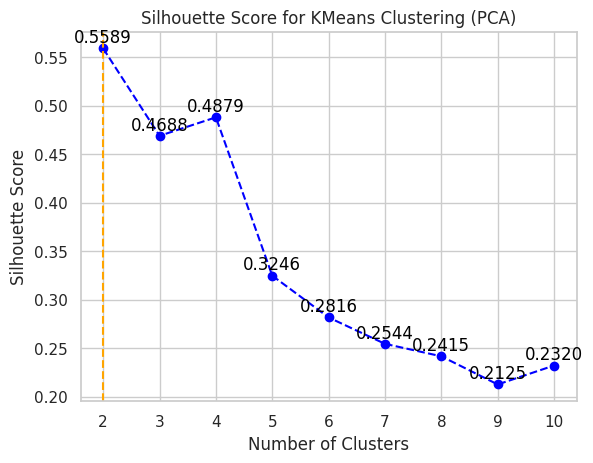


Evaluating Agglomerative clustering with PCA dimensionality reduction
Agglomerative Clusters: 2, Average Silhouette Score: 0.5158112547868473
Agglomerative Clusters: 3, Average Silhouette Score: 0.41122230883788097
Agglomerative Clusters: 4, Average Silhouette Score: 0.4438256892779969
Agglomerative Clusters: 5, Average Silhouette Score: 0.4312316764122312
Agglomerative Clusters: 6, Average Silhouette Score: 0.39033564323452213
Agglomerative Clusters: 7, Average Silhouette Score: 0.274900889643081
Agglomerative Clusters: 8, Average Silhouette Score: 0.26839996506545205
Agglomerative Clusters: 9, Average Silhouette Score: 0.2755512598509348
Agglomerative Clusters: 10, Average Silhouette Score: 0.2510409976779323


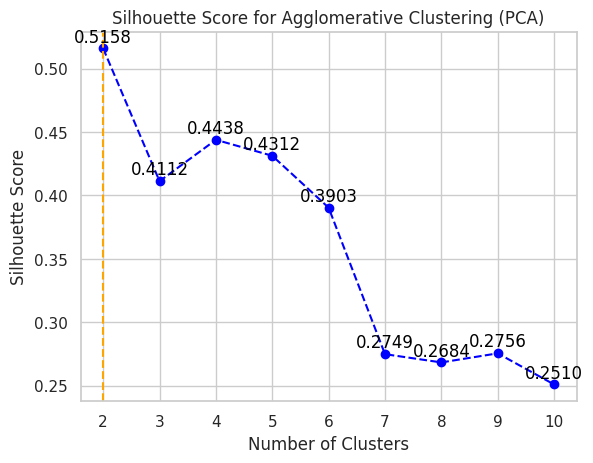


Evaluating KMeans clustering with t-SNE dimensionality reduction
KMeans Clusters: 2, Average Silhouette Score: 0.3299032151699066
KMeans Clusters: 3, Average Silhouette Score: 0.3757704496383667
KMeans Clusters: 4, Average Silhouette Score: 0.4488915503025055
KMeans Clusters: 5, Average Silhouette Score: 0.5999605059623718
KMeans Clusters: 6, Average Silhouette Score: 0.5888676047325134
KMeans Clusters: 7, Average Silhouette Score: 0.5692417025566101
KMeans Clusters: 8, Average Silhouette Score: 0.490306556224823
KMeans Clusters: 9, Average Silhouette Score: 0.4590963125228882
KMeans Clusters: 10, Average Silhouette Score: 0.38713976740837097


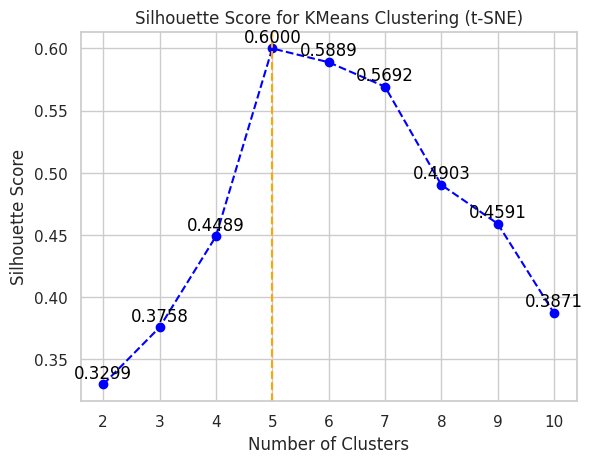


Evaluating Agglomerative clustering with t-SNE dimensionality reduction
Agglomerative Clusters: 2, Average Silhouette Score: 0.38492414355278015
Agglomerative Clusters: 3, Average Silhouette Score: 0.44621407985687256
Agglomerative Clusters: 4, Average Silhouette Score: 0.57859206199646
Agglomerative Clusters: 5, Average Silhouette Score: 0.581656277179718
Agglomerative Clusters: 6, Average Silhouette Score: 0.5769739151000977
Agglomerative Clusters: 7, Average Silhouette Score: 0.5692417025566101
Agglomerative Clusters: 8, Average Silhouette Score: 0.5760762095451355
Agglomerative Clusters: 9, Average Silhouette Score: 0.49133893847465515
Agglomerative Clusters: 10, Average Silhouette Score: 0.4414517283439636


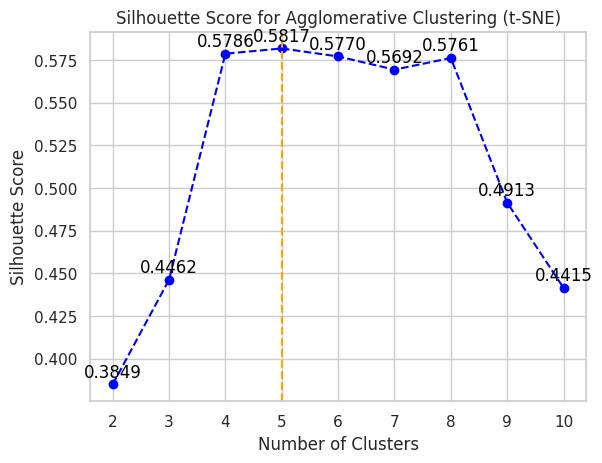


Best Dimensionality Reduction: t-SNE
Best Clustering Method: KMeans
Best Number of Clusters: 5
Best Silhouette Score: 0.5999605059623718


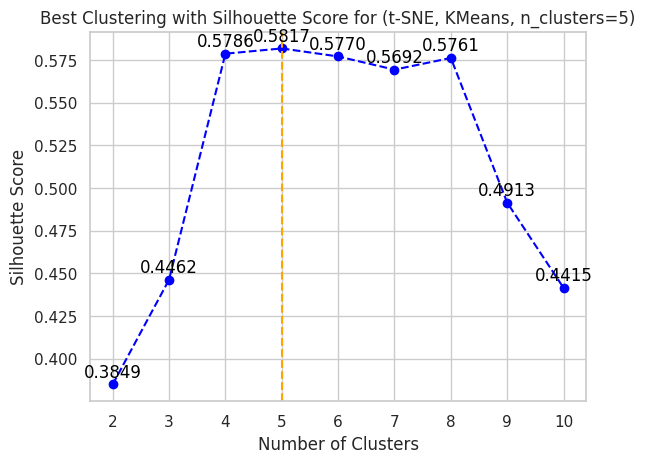

In [54]:
# menentukan feature yang akan digunakan untuk clustering (kecuali 'Country')
features_for_clustering = features[1:]

# membuat dictionary metode pengurangan dimensionalitas
dim_reduction_methods = {
    'PCA': PCA(n_components=2),  # mengurangi menjadi 2 komponen
    't-SNE': TSNE(n_components=2, perplexity=1, random_state=42)
}

# membuat dictionary metode clustering
clustering_methods = {
    'KMeans': KMeans(random_state=42),
    'Agglomerative': AgglomerativeClustering()
}

best_dim_reduction = None
best_clustering_method = None
best_n_clusters = None
best_silhouette_score = -1

for dim_method_name, dim_method in dim_reduction_methods.items():

    reduced_data = dim_method.fit_transform(clustered_features[features_for_clustering])

    for cluster_method_name, cluster_method in clustering_methods.items():

        silhouette_scores = []
        print(f"Evaluating {cluster_method_name} clustering with {dim_method_name} dimensionality reduction")
        for n_clusters in range(2, 11):  # menguji n_cluster dari 2 hingga 10

            if cluster_method_name in ['KMeans', 'Agglomerative']:
                cluster_method.set_params(n_clusters=n_clusters)

            cluster_labels = cluster_method.fit_predict(reduced_data)
            silhouette_avg = silhouette_score(reduced_data, cluster_labels)
            silhouette_scores.append(silhouette_avg)

            # mencetak iterasi saat ini dengan silhouette score rata-rata
            print(f"{cluster_method_name} Clusters: {n_clusters}, Average Silhouette Score: {silhouette_avg:}")

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_dim_reduction = dim_method_name
                best_clustering_method = cluster_method_name
                best_n_clusters = n_clusters

        # visualisasi
        plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='blue')
        plt.axvline(x=best_n_clusters, linestyle='--', color='orange', label=f'Model: {best_n_clusters} Clusters')
        for i, score in enumerate(silhouette_scores):
            plt.text(range(2, 11)[i], silhouette_scores[i] + 0.002, f'{silhouette_scores[i]:.4f}',
                      ha='center', va='bottom', fontsize=12, color='black')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Silhouette Score')
        plt.title(f'Silhouette Score for {cluster_method_name} Clustering ({dim_method_name})')
        plt.show()
        print()

# menyesuaikan model terbaik dengan seluruh dataset
best_dim_method = dim_reduction_methods[best_dim_reduction]
reduced_data = best_dim_method.fit_transform(clustered_features[features_for_clustering])

if best_clustering_method == "KMeans":
    best_cluster_method = KMeans(n_clusters=best_n_clusters, random_state=42)
elif best_clustering_method == 'Agglomerative':
    best_cluster_method = AgglomerativeClustering(n_clusters=best_n_clusters)

cluster_labels = best_cluster_method.fit_predict(reduced_data)
clustered_features['Cluster'] = cluster_labels

print(f"Best Dimensionality Reduction: {best_dim_reduction}")
print(f"Best Clustering Method: {best_clustering_method}")
print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best Silhouette Score: {best_silhouette_score}")

# visualisasi akhir dari metode clustering terbaik
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='blue')
plt.axvline(x=best_n_clusters, linestyle='--', color='orange', label=f'Model: {best_n_clusters} Clusters')
for i, score in enumerate(silhouette_scores):
    plt.text(range(2, 11)[i], silhouette_scores[i] + 0.002, f'{silhouette_scores[i]:.4f}',
              ha='center', va='bottom', fontsize=12, color='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title(f'Best Clustering with Silhouette Score for ({best_dim_reduction}, {best_clustering_method}, n_clusters={best_n_clusters})')
plt.show()

> **Insight**:
- Kode ini memungkinkan untuk mengeksplorasi berbagai kombinasi metode reduksi dimensi dan teknik clustering untuk menemukan yang terbaik berdasarkan ukuran kualitas seperti Silhouette Score.
- Dengan menggunakan teknik evaluasi ini, kita dapat memastikan bahwa kita memilih metode clustering yang memberikan pembagian klaster terbaik berdasarkan data yang ada.
- Visualisasi grafik membantu untuk melihat bagaimana hasil clustering berubah ketika jumlah klaster berbeda, serta memberikan gambaran yang jelas mengenai kualitas clustering yang dihasilkan oleh berbagai metode dan jumlah klaster.

## **Cluster Results**

In [55]:
# mengambil kolom numeric untuk analisis statistik deskriptif
numeric_data = clustered_features.select_dtypes(include='number')

# menghitung rata-rata per cluster
cluster_stats = numeric_data.groupby(clustered_features['Cluster']).mean()

# mengubah kolom 'Cluster' menjadi integer (tanpa desimal)
cluster_stats['Cluster'] = cluster_stats['Cluster'].astype(int)

# melakukan analisis statistik deskriptif untuk setiap cluster
print("Statistik Deskriptif per Cluster:")
cluster_stats

Statistik Deskriptif per Cluster:


Agricultural land (sq. km)  \
Cluster                               
0                              0.37   
1                              0.02   
2                              0.54   
3                              0.02   
4                              0.27   

         Agricultural raw materials exports (Percentage of merchandise exports)  \
Cluster                                                                           
0                                                     0.39                        
1                                                     0.13                        
2                                                     0.62                        
3                                                     0.12                        
4                                                     0.29                        

         Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)  \
Cluster                                                              
0                                                     0.56           
1                                                     0.02           
2                                                     0.14           
3                                                     0.03           
4                                                     0.10           

         Employment in agriculture (Percentage of total employment) (modeled ILO estimate)  \
Cluster                                                                                      
0                                                     0.63                                   
1                                                     0.04                                   
2                                                     0.03                                   
3                                                     0.07                                   
4                                                     0.23                                   

         Labour tax revenue (Percentage of GDP)  \
Cluster                                           
0                                          0.27   
1                                          0.77   
2                                          0.59   
3                                          0.62   
4                                          0.30   

         Real GDP per capita (US dollars per person, PPP converted)  \
Cluster                                                               
0                                                     0.25            
1                                                     0.79            
2                                                     0.89            
3                                                     0.74            
4                                                     0.34            

         Life expectancy at birth (Years)  \
Cluster                                     
0                                    0.57   
1                                    0.93   
2                                    0.88   
3                                    0.91   
4                                    0.51   

         Population density (Inhabitants per square kilometre)  \
Cluster                                                          
0                                                     0.39       
1                                                     0.57       
2                                                     0.02       
3                                                     0.63       
4                                                     0.07       

         Energy intensity per capita (Tonnes of oil equivalent per person)  \
Cluster                                                                      
0                                                     0.16                   
1                                                     0.43                   
2                                                     0.

> **Insight:** Menampilkan hasil cluster berdasarkan grup clusternya. Dengan ini dapat diketahui masing-masing karakteristik tingkat variabel satu sama lain diantara cluster.

In [56]:
# mengelompokkan negara berdasarkan cluster
clustered_countries = clustered_features.groupby('Cluster')['Country'].apply(lambda x: ', '.join(x)).reset_index()

# mengubah menjadi dataframe agar lebih terstruktur
cluster_table = pd.DataFrame(clustered_countries)

# menampilkan tabel
cluster_table

Cluster                                            Country
0        0                    China, France, India, Indonesia
1        1                                     Germany, Japan
2        2                   Australia, Canada, United States
3        3                 Italy, South Korea, United Kingdom
4        4  Argentina, Brazil, Mexico, Russia, Saudi Arabi...

> **Kriteria Pengkategorian**
- Sangat Rendah: Nilai antara 0.0 dan 0.2
- Rendah: Nilai antara 0.2 dan 0.4
- Sedang: Nilai antara 0.4 dan 0.6
- Tinggi: Nilai antara 0.6 dan 0.8
- Sangat Tinggi: Nilai antara 0.8 dan 1.0

> Kriteria ditentukan berdasarkan hasil data scaling menggunakan MinMax dan reduksi dimensi t-SNE.


> **Cluster 0: Argentina, Brazil, China, India, Indonesia, Mexico, Russia, Saudi Arabia, South Africa, Türkiye**
- Lahan pertanian (km persegi): 0.33 (Rendah)
- Ekspor bahan baku pertanian: 0.34 (Rendah)
- Emisi karbon dioksida (CO2) dari Pertanian: 0.28 (Rendah)
- Pekerjaan di bidang pertanian: 0.40 (Rendah)
- Pendapatan pajak tenaga kerja: 0.22 (Rendah)
- PDB riil per kapita: 0.26 (Rendah)
- Harapan hidup saat lahir: 0.49 (Sedang)
- Kepadatan penduduk: 0.18 (Sangat Rendah)
- Intensitas energi per kapita: 0.24 (Rendah)
- Total pasokan energi: 0.17 (Sangat Rendah)
- Pasokan energi terbarukan: 0.25 (Rendah)
- Konsumsi energi: 0.57 (Sedang)

> **Cluster 1: Australia, Canada, United States**
- Lahan pertanian (km persegi): 0.54 (Sedang)
- Ekspor bahan baku pertanian: 0.62 (Tinggi)
- Emisi karbon dioksida (CO2) dari Pertanian: 0.14 (Sangat Rendah)
- Pekerjaan di bidang pertanian: 0.03 (Sangat Rendah)
- Pendapatan pajak tenaga kerja: 0.59 (Sedang)
- PDB riil per kapita: 0.86 (Sangat Tinggi)
- Harapan hidup saat lahir: 0.88 (Sangat Tinggi)
- Kepadatan penduduk: 0.02 (Sangat Rendah)
- Intensitas energi per kapita: 0.85 (Sangat Tinggi)
- Total pasokan energi: 0.32 (Rendah)
- Pasokan energi terbarukan: 0.25 (Rendah)
- Konsumsi energi: 0.78 (Tinggi)

> **Cluster 2: Germany, Japan**
- Lahan pertanian (km persegi): 0.02 (Sangat Rendah)
- Ekspor bahan baku pertanian: 0.13 (Sangat Rendah)
- Emisi karbon dioksida (CO2) dari Pertanian: 0.02 (Sangat Rendah)
- Pekerjaan di bidang pertanian: 0.04 (Sangat Rendah)
- Pendapatan pajak tenaga kerja: 0.78 (Tinggi)
- PDB riil per kapita: 0.75 (Tinggi)
- Harapan hidup saat lahir: 0.93 (Sangat Tinggi)
- Kepadatan penduduk: 0.57 (Sedang)
- Intensitas energi per kapita: 0.43 (Sedang)
- Total pasokan energi: 0.13 (Sangat Rendah)
- Pasokan energi terbarukan: 0.10 (Sangat Rendah)
- Konsumsi energi: 1.00 (Sangat Tinggi)

> **Cluster 3: France, Italy, South Korea, United Kingdom**
- Lahan pertanian (km persegi): 0.03 (Sangat Rendah)
- Ekspor bahan baku pertanian: 0.13 (Sangat Rendah)
- Emisi karbon dioksida (CO2) dari Pertanian: 0.05 (Sangat Rendah)
- Pekerjaan di bidang pertanian: 0.06 (Sangat Rendah)
- Pendapatan pajak tenaga kerja: 0.72 (Tinggi)
- PDB riil per kapita: 0.67 (Tinggi)
- Harapan hidup saat lahir: 0.91 (Sangat Tinggi)
- Kepadatan penduduk: 0.53 (Sedang)
- Intensitas energi per kapita: 0.42 (Sedang)
- Total pasokan energi: 0.06 (Sangat Rendah)
- Pasokan energi terbarukan: 0.05 (Sangat Rendah)
- Konsumsi energi: 0.42 (Sedang)

## **Visualization**

In [57]:
# melakukan t-SNE untuk mereduksi dimensi
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
tsne_results = tsne.fit_transform(clustered_features.drop(columns=['Country', 'Cluster']))
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE-1', 'TSNE-2'])
tsne_df['Cluster'] = clustered_features['Cluster'].values
tsne_df['Country'] = clustered_features['Country'].values

# menggunakan plotly untuk membuat scatter plot dengan nama negara
fig = px.scatter(
    tsne_df, x='TSNE-1', y='TSNE-2', color='Cluster',
    hover_name='Country',
    title='Menilik Dampak Sektor Pertanian terhadap Sosio-Ekonomi dan Efisiensi Energi pada Negara Anggota G20',
    labels={'Cluster': 'Cluster'},
    color_discrete_sequence=px.colors.qualitative.Dark2,
    size_max=15
)

# menambahkan label untuk nama negara dan mengatur posisi serta ukuran font
fig.update_traces(
    text=tsne_df['Country'],
    textposition='top center',
    mode='markers+text',
    marker=dict(size=15),
    textfont=dict(size=10)  # mengatur ukuran font untuk nama negara
)

# mengatur layout agar judul dan elemen plot lebih rapih
fig.update_layout(
    title={
        'text': 'Visualisasi Cluster 2D t-SNE',
        'font': {'size': 18, 'color': 'black', 'weight': 'bold'},
        'x': 0.5,
        'xanchor': 'center'
    },
    autosize=True
)

# menampilkan plot
fig.show()

> **Insight**: Berikut ini adalah hasil clustering dengan Visualisasi t-SNE 2D dengan mengelompokkan negara-negara anggota G20 berdasarkan parameter yang sudah ditentukan dan menjadi 4 cluster berbeda.

In [58]:
# menggunakan t-SNE untuk mereduksi dimensi
tsne = TSNE(n_components=3, random_state=42, perplexity=1)
tsne_results = tsne.fit_transform(clustered_features.drop(columns=['Country', 'Cluster']))
tsne_df = pd.DataFrame(tsne_results, columns=['Dim1', 'Dim2', 'Dim3'])
tsne_df['Cluster'] = clustered_features['Cluster']
tsne_df['Country'] = clustered_features['Country']

# melakukan plot 3D t-SNE
fig = px.scatter_3d(
    tsne_df, x='Dim1', y='Dim2', z='Dim3', color='Cluster',
    hover_name='Country',
    labels={'Cluster': 'Cluster'}
)

# melakukan layout
fig.update_layout(
    title={
        'text': 'Visualisasi Cluster 3D t-SNE',
        'font': {'size': 18, 'color': 'black', 'weight': 'bold'},
        'x': 0.5,
        'xanchor': 'center'
    },
    scene=dict(
        xaxis_title='Dimensi 1',
        yaxis_title='Dimensi 2',
        zaxis_title='Dimensi 3'
    )
)

fig.show()

> **Insight**: Berikut ini adalah hasil clustering dengan Visualisasi t-SNE 3D dengan mengelompokkan negara-negara anggota G20 berdasarkan parameter yang sudah ditentukan dan menjadi 4 cluster berbeda.

# **Conclusion**

In [59]:
import pandas as pd

# membuat DataFrame dengan data yang baru
data = {
    'Kriteria': [
        'Lahan pertanian (km persegi)', 'Ekspor bahan baku pertanian', 'Emisi karbon dioksida (CO2) dari Pertanian',
        'Pekerjaan di bidang pertanian', 'Pendapatan pajak tenaga kerja', 'PDB riil per kapita',
        'Harapan hidup saat lahir', 'Kepadatan penduduk', 'Intensitas energi per kapita', 'Total pasokan energi',
        'Pasokan energi terbarukan', 'Konsumsi energi'
    ],
    'Cluster 0': [
        (0.33, 'Rendah'), (0.34, 'Rendah'), (0.28, 'Rendah'), (0.40, 'Rendah'), (0.22, 'Rendah'),
        (0.26, 'Rendah'), (0.49, 'Sedang'), (0.18, 'Sangat Rendah'), (0.24, 'Rendah'), (0.17, 'Sangat Rendah'),
        (0.25, 'Rendah'), (0.57, 'Sedang')
    ],
    'Cluster 1': [
        (0.54, 'Sedang'), (0.62, 'Tinggi'), (0.14, 'Sangat Rendah'), (0.03, 'Sangat Rendah'), (0.59, 'Sedang'),
        (0.86, 'Sangat Tinggi'), (0.88, 'Sangat Tinggi'), (0.02, 'Sangat Rendah'), (0.85, 'Sangat Tinggi'),
        (0.32, 'Rendah'), (0.25, 'Rendah'), (0.78, 'Tinggi')
    ],
    'Cluster 2': [
        (0.02, 'Sangat Rendah'), (0.13, 'Sangat Rendah'), (0.02, 'Sangat Rendah'), (0.04, 'Sangat Rendah'),
        (0.78, 'Tinggi'), (0.75, 'Tinggi'), (0.93, 'Sangat Tinggi'), (0.57, 'Sedang'), (0.43, 'Sedang'),
        (0.13, 'Sangat Rendah'), (0.10, 'Sangat Rendah'), (1.00, 'Sangat Tinggi')
    ],
    'Cluster 3': [
        (0.03, 'Sangat Rendah'), (0.13, 'Sangat Rendah'), (0.05, 'Sangat Rendah'), (0.06, 'Sangat Rendah'),
        (0.72, 'Tinggi'), (0.67, 'Tinggi'), (0.91, 'Sangat Tinggi'), (0.53, 'Sedang'), (0.42, 'Sedang'),
        (0.06, 'Sangat Rendah'), (0.05, 'Sangat Rendah'), (0.42, 'Sedang')
    ]
}

# membuat DataFrame dari data
df = pd.DataFrame(data)

# menyusun data untuk styling dan format output
def color_cell(val):
    color_map = {
        'Sangat Rendah': 'background-color: red',
        'Rendah': 'background-color: orange',
        'Sedang': 'background-color: yellow',
        'Tinggi': 'background-color: lightgreen',
        'Sangat Tinggi': 'background-color: green'
    }
    return color_map.get(val, '')

# menyusun kolom rata-rata dan keterangan
for cluster in ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']:
    df[cluster] = df[cluster].apply(lambda x: f"{x[0]:.2f} ({x[1]})")

# styling
styled_df = df.style.applymap(lambda x: color_cell(x.split('(')[-1][:-1]), subset=pd.IndexSlice[:, ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']])

# menampilkan DataFrame dengan styling
styled_df

/tmp/ipython-input-1409311309.py:52: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



1. **Interpretasi dari Model dan Hasil Evaluasi**
- Model clustering yang diterapkan, baik menggunakan **PCA** atau **t-SNE** untuk pengurangan dimensi, bersama dengan metode clustering seperti **K-Means** dan **Agglomerative Clustering**, menghasilkan empat cluster utama yang masing-masing mewakili kelompok negara dengan karakteristik yang serupa.
- Hasil evaluasi menunjukkan bahwa **Cluster 0** berisi negara-negara dengan ketergantungan tinggi pada sektor pertanian namun memiliki efisiensi energi rendah, sementara **Cluster 1** mencakup negara-negara maju dengan sektor pertanian yang relatif lebih kecil, tetapi efisiensi energi dan tingkat kemakmuran yang tinggi. **Cluster 2** dan **Cluster 3** mencerminkan negara-negara dengan karakteristik yang lebih variatif dalam sektor pertanian dan efisiensi energi, dengan **Cluster 3** menunjukkan negara dengan tingkat kehidupan yang lebih tinggi dan infrastruktur energi yang lebih berkembang.

2. **Insight yang Didapat dari Dataset**
- **Negara dengan ketergantungan tinggi pada sektor pertanian** (Cluster 0) cenderung memiliki emisi karbon yang lebih tinggi dan efisiensi energi yang rendah.
- **Negara maju** (Cluster 1, Cluster 2, Cluster 3) cenderung memiliki pendapatan per kapita yang lebih tinggi, harapan hidup yang lebih tinggi, dan konsumsi energi yang lebih efisien.
- Terdapat potensi bagi negara-negara dalam **Cluster 0** untuk meningkatkan efisiensi energi dan mengurangi dampak negatif sektor pertanian melalui teknologi yang lebih ramah lingkungan dan pengelolaan energi terbarukan.

3. **Kesimpulan/Rekomendasi yang Diberikan**
- **Negara-negara yang lebih bergantung pada sektor pertanian** sebaiknya mulai fokus pada pengembangan teknologi ramah lingkungan dan meningkatkan efisiensi energi untuk mendukung keberlanjutan.
- **Negara-negara maju** yang telah memiliki infrastruktur energi yang baik bisa lebih fokus pada keberlanjutan sektor pertanian dengan mengurangi jejak karbon dan meningkatkan efisiensi dalam penggunaan sumber daya.
- Negara-negara dalam **Cluster 1** dan **Cluster 2** dengan tingkat konsumsi energi yang lebih tinggi dan emisi rendah dapat memimpin transisi ke pertanian yang lebih berkelanjutan.

4. **Business Solution: Saran yang Menjawab Permasalahan**
- **Peningkatan Investasi dalam Teknologi Hijau**: Negara-negara dalam Cluster 0 sebaiknya mengalokasikan lebih banyak investasi pada teknologi pertanian yang lebih ramah lingkungan dan meningkatkan efisiensi energi di sektor pertanian.
- **Polarisasi Kebijakan Energi dan Pertanian**: Negara-negara dalam Cluster 1 bisa mengimplementasikan kebijakan untuk memperkuat sektor pertanian dengan mengurangi dampak karbon dan meningkatkan penggunaan energi terbarukan.
- **Program Kolaborasi Internasional**: Negara-negara G20 bisa saling berbagi pengetahuan dan teknologi untuk mengatasi masalah yang dihadapi negara-negara dengan ketergantungan tinggi pada sektor pertanian.

5. **Solutioning**
- Penyusunan kebijakan energi yang lebih efisien dan ramah lingkungan di negara-negara dengan ketergantungan tinggi pada sektor pertanian.
- Peningkatan penggunaan teknologi energi terbarukan dan praktik pertanian berkelanjutan.
- Pembentukan kemitraan dan kerjasama antara negara-negara maju dan berkembang untuk berbagi teknologi dan pengetahuan yang dapat mendukung keberlanjutan sektor pertanian dan energi.

6. **Relevance**
- Solusi yang ditawarkan sangat relevan dengan hasil analisis yang telah dilakukan. Clustering yang menunjukkan negara dengan ketergantungan tinggi pada pertanian dan rendahnya efisiensi energi mengarahkan pada kebutuhan untuk fokus pada teknologi hijau dan pengelolaan energi. Negara-negara yang lebih maju diharapkan untuk terus meningkatkan efisiensi energi sambil mengurangi dampak karbon dari sektor pertanian mereka. Dengan solusi yang terarah berdasarkan cluster ini, negara-negara G20 dapat bekerja lebih efektif dalam mencapai tujuan pembangunan berkelanjutan.